In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ks_2samp, chi2_contingency, pearsonr, f_oneway
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, chi2, f_regression

#ML libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import random

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset

df = pd.read_csv('Shill Bidding Dataset.csv', index_col='Record_ID')
df.head()

Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
Record_ID                                                         
1                 732     _***i         0.200000       0.400000   
2                 732     g***r         0.024390       0.200000   
3                 732     t***p         0.142857       0.200000   
4                 732     7***n         0.100000       0.200000   
5                 900     z***z         0.051282       0.222222   

           Successive_Outbidding  Last_Bidding  Auction_Bids  \
Record_ID                                                      
1                            0.0      0.000028           0.0   
2                            0.0      0.013123           0.0   
3                            0.0      0.003042           0.0   
4                            0.0      0.097477           0.0   
5                            0.0      0.001318           0.0   

           Starting_Price_Average  Early_Bidding  Winning_Ratio  \
Record_ID                                                         
1                        0.993593       0.000028       0.666667   
2                        0.993593       0.013123       0.944444   
3                        0.993593       0.003042       1.000000   
4                        0.993593       0.097477       1.000000   
5                        0.000000       0.001242       0.500000   

           Auction_Duration  Class  
Record_ID                           
1                         5      0  
2                         5      0  
3                         5      0  
4                         5      0  
5                         7      0

# 1- Data Exploration and Preprocessing

### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6321 entries, 1 to 15144
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Auction_ID              6321 non-null   int64  
 1   Bidder_ID               6321 non-null   object 
 2   Bidder_Tendency         6321 non-null   float64
 3   Bidding_Ratio           6321 non-null   float64
 4   Successive_Outbidding   6321 non-null   float64
 5   Last_Bidding            6321 non-null   float64
 6   Auction_Bids            6321 non-null   float64
 7   Starting_Price_Average  6321 non-null   float64
 8   Early_Bidding           6321 non-null   float64
 9   Winning_Ratio           6321 non-null   float64
 10  Auction_Duration        6321 non-null   int64  
 11  Class                   6321 non-null   int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 642.0+ KB


In [4]:
df.describe()

Auction_ID  Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  \
count  6321.000000      6321.000000    6321.000000            6321.000000   
mean   1241.388230         0.142541       0.127670               0.103781   
std     735.770789         0.197084       0.131530               0.279698   
min       5.000000         0.000000       0.011765               0.000000   
25%     589.000000         0.027027       0.043478               0.000000   
50%    1246.000000         0.062500       0.083333               0.000000   
75%    1867.000000         0.166667       0.166667               0.000000   
max    2538.000000         1.000000       1.000000               1.000000   

       Last_Bidding  Auction_Bids  Starting_Price_Average  Early_Bidding  \
count   6321.000000   6321.000000             6321.000000    6321.000000   
mean       0.463119      0.231606                0.472821       0.430683   
std        0.380097      0.255252                0.489912       0.380785   
min        0.000000      0.000000                0.000000       0.000000   
25%        0.047928      0.000000                0.000000       0.026620   
50%        0.440937      0.142857                0.000000       0.360104   
75%        0.860363      0.454545                0.993593       0.826761   
max        0.999900      0.788235                0.999935       0.999900   

       Winning_Ratio  Auction_Duration        Class  
count    6321.000000       6321.000000  6321.000000  
mean        0.367731          4.615093     0.106787  
std         0.436573          2.466629     0.308867  
min         0.000000          1.000000     0.000000  
25%         0.000000          3.000000     0.000000  
50%         0.000000          5.000000     0.000000  
75%         0.851852          7.000000     0.000000  
max         1.000000         10.000000     1.000000

In [5]:
df.isnull().sum()

Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

In [6]:
df.isna().sum()

Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

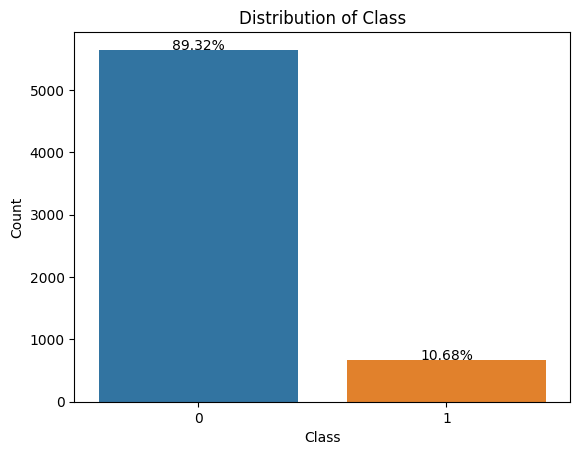

Class
0    5646
1     675
Name: count, dtype: int64
% of Class 1: 10.678690080683436


In [7]:
sns.countplot(data=df, x='Class')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')

# Calculate the total number of instances in the dataset
total = len(df['Class'])

# Annotate the bars with the percentage of each class
for p in plt.gca().patches:
    height = p.get_height()  # Get the height of each bar
    # Calculate the percentage of each class based on the height
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height/total)*100), ha='center')

plt.show()


print(df.Class.value_counts())

# Calculate the percentage of Class 1 instances
percentage_class_1 = (df[df['Class'] == 1]['Class'].count() / df['Class'].count()) * 100

print("% of Class 1:", percentage_class_1)

In [8]:
df_ebay = df.copy()

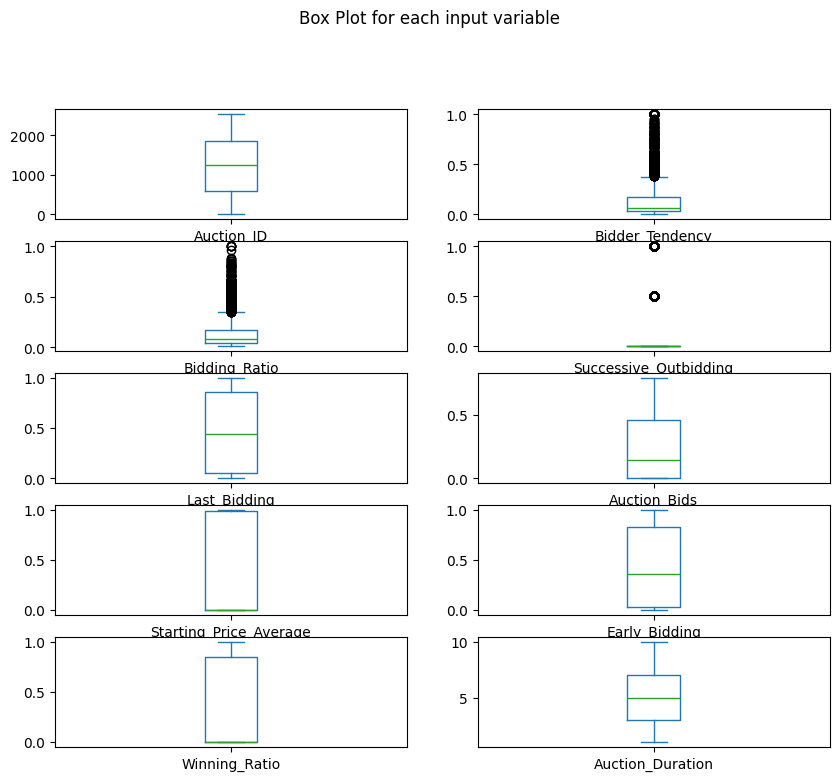

In [9]:
df.drop('Class', axis=1).plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False, figsize=(10,10), title='Box Plot for each input variable')
plt.show()

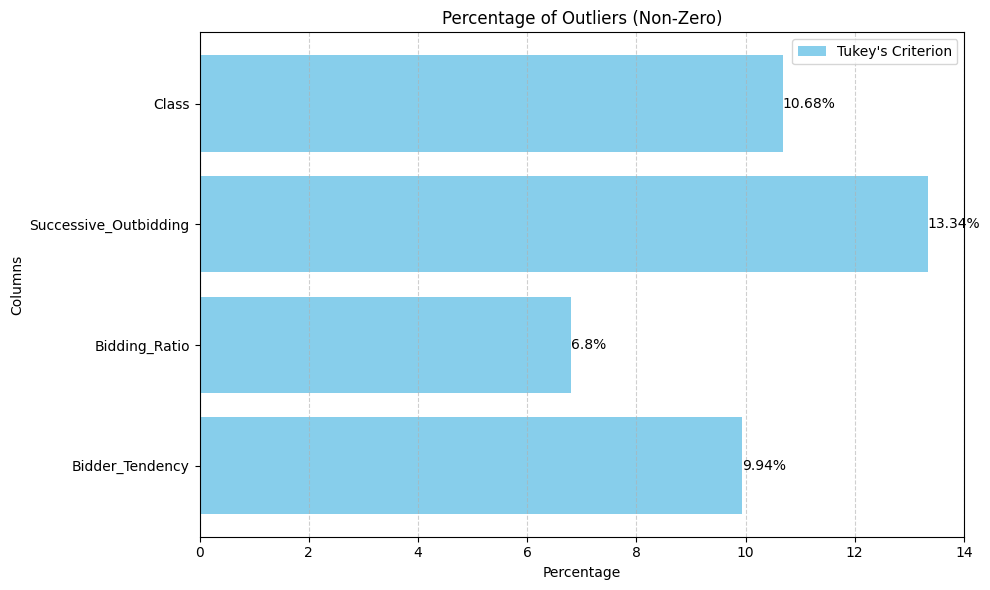

In [10]:
def calculate_percentage_of_outliers(df_ebay, column_name, criterion='tukey'):
    # Calculate Interquartile Range
    Q1 = df_ebay[column_name].quantile(0.25)
    Q3 = df_ebay[column_name].quantile(0.75)
    IQR = Q3 - Q1

    if criterion == 'tukey':
        # Identify outliers using Tukey's criterion
        outliers = ((df_ebay[column_name] < (Q1 - 1.5 * IQR)) | (df_ebay[column_name] > (Q3 + 1.5 * IQR)))
    else:
        raise ValueError("Unsupported criterion. Use 'tukey'.")

    # Calculate the percentage of outliers
    percentage_of_outliers = round((outliers.sum() / len(df_ebay)) * 100, 2)

    return percentage_of_outliers

# Iterate over numerical columns
numerical_columns = df_ebay.select_dtypes(include=[np.number]).columns

percentage_outliers_tukey = []
columns_with_outliers = []

for column in numerical_columns:
    percentage_tukey = calculate_percentage_of_outliers(df_ebay, column)
    if percentage_tukey != 0:
        percentage_outliers_tukey.append(percentage_tukey)
        columns_with_outliers.append(column)

# Plotting the results for columns with non-zero outlier percentages
plt.figure(figsize=(10, 6))

bars_tukey = plt.barh(np.arange(len(columns_with_outliers)), percentage_outliers_tukey, color='skyblue', label="Tukey's Criterion")

# Add percentage values to the bars
for i, bar in enumerate(bars_tukey):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}%', ha='left', va='center', color='black')

plt.yticks(np.arange(len(columns_with_outliers)), columns_with_outliers)
plt.xlabel('Percentage')
plt.ylabel('Columns')
plt.title('Percentage of Outliers (Non-Zero)')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

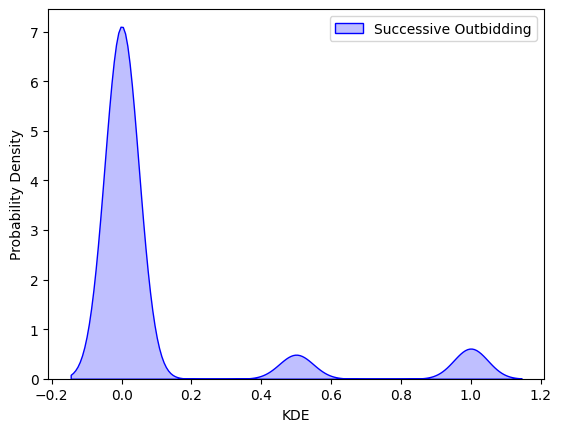

In [11]:
sns.kdeplot(data=df_ebay, x='Successive_Outbidding', color='b', shade=True, label='Successive Outbidding')
plt.xlabel('KDE')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [12]:
df_ebay.Successive_Outbidding.value_counts()

Successive_Outbidding
0.0    5478
1.0     469
0.5     374
Name: count, dtype: int64

#### Distribution Analysis

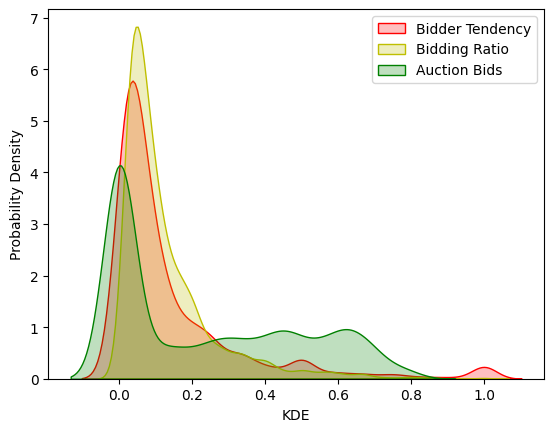

In [13]:
sns.kdeplot(data=df_ebay, x='Bidder_Tendency', color='r', shade=True, label='Bidder Tendency')
sns.kdeplot(data=df_ebay, x='Bidding_Ratio', color='y', shade=True, label='Bidding Ratio')
sns.kdeplot(data=df_ebay, x='Auction_Bids', color='g', shade=True, label='Auction Bids')

plt.xlabel('KDE')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [14]:
from scipy import stats

# Select only numerical columns
numerical_columns = df_ebay.select_dtypes(include='number').columns

# Loop through numerical columns
for column in numerical_columns:
    if column != 'Class':
        pearson_coef, p_value = stats.pearsonr(df_ebay[column], df_ebay['Class'])
        # Interpretation of the results
        print(f'Analysis between {column} and Class:')
        print(f'Pearson correlation coefficient: {pearson_coef}')
        print(f'P-value: {p_value}')
        
        if abs(pearson_coef) >= 0.7:
            print('Correlation Coefficient: Large relationship')
        elif 0.3 <= abs(pearson_coef) < 0.7:
            print('Correlation Coefficient: Moderate relationship')
        else:
            print('Correlation Coefficient: No significant relationship')
        
        if p_value < 0.001:
            print('P-value: Strong certainty in the result')
        elif p_value < 0.05:
            print('P-value: Moderate certainty in the result')
        elif p_value < 0.1:
            print('P-value: Weak certainty in the result')
        else:
            print('P-value: No certainty in the result')
        
        print('\n')

Analysis between Auction_ID and Class:
Pearson correlation coefficient: -0.007984712070532408
P-value: 0.525619632219598
Correlation Coefficient: No significant relationship
P-value: No certainty in the result


Analysis between Bidder_Tendency and Class:
Pearson correlation coefficient: 0.29553305976302824
P-value: 1.3394686513774092e-127
Correlation Coefficient: No significant relationship
P-value: Strong certainty in the result


Analysis between Bidding_Ratio and Class:
Pearson correlation coefficient: 0.569434581061887
P-value: 0.0
Correlation Coefficient: Moderate relationship
P-value: Strong certainty in the result


Analysis between Successive_Outbidding and Class:
Pearson correlation coefficient: 0.9010351522612196
P-value: 0.0
Correlation Coefficient: Large relationship
P-value: Strong certainty in the result


Analysis between Last_Bidding and Class:
Pearson correlation coefficient: 0.09765526654848403
P-value: 7.188402581411639e-15
Correlation Coefficient: No significant re

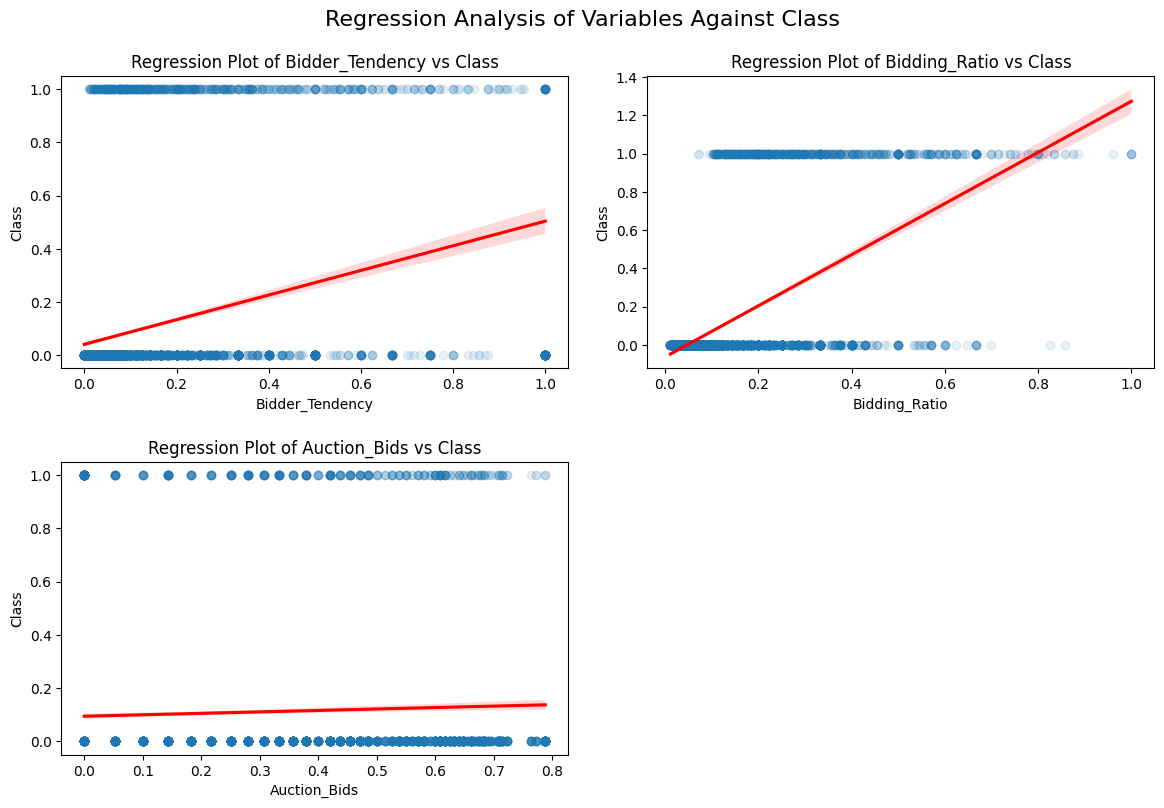

In [15]:
# List of variables
variables = ['Bidder_Tendency', 'Bidding_Ratio', 'Auction_Bids']  

plt.figure(figsize=(12, 8))

# Loop through the variables to create a subplot for each, arranging them in 2 rows
for i, var in enumerate(variables):
    if i < 2:  # First two variables in the first row
        plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns, ith subplot (1 or 2)
    else:  # Third variable in the second row
        plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns, 3rd subplot (occupies the third position in a grid of 4)

    sns.regplot(x=var, y='Class', data=df_ebay, logistic=False, scatter_kws={'alpha':0.1}, line_kws={'color': 'red'})
    plt.title(f'Regression Plot of {var} vs Class')
    plt.xlabel(var)
    plt.ylabel('Class')

# Adjust layout
plt.tight_layout(pad=2)  # Add padding between plots
plt.suptitle('Regression Analysis of Variables Against Class', size=16, y=1.02)  # Title for the whole figure
plt.show()


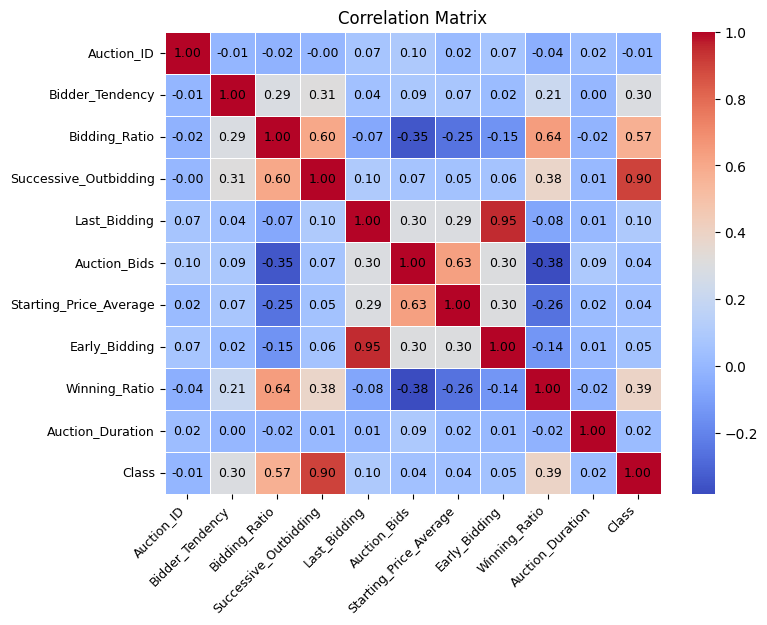

In [16]:
# Select only the numerical columns (excluding 'Record_ID')
numerical_columns = df_ebay.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
# print("Correlation Matrix:")
# print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=.5)
# Manually annotate the heatmap
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=9)
plt.title("Correlation Matrix")
# Rotate labels on the x-axis and adjust the font size
plt.xticks(rotation=45, ha="right", fontsize = 9)
plt.yticks(ha="right", fontsize = 9)
plt.show()



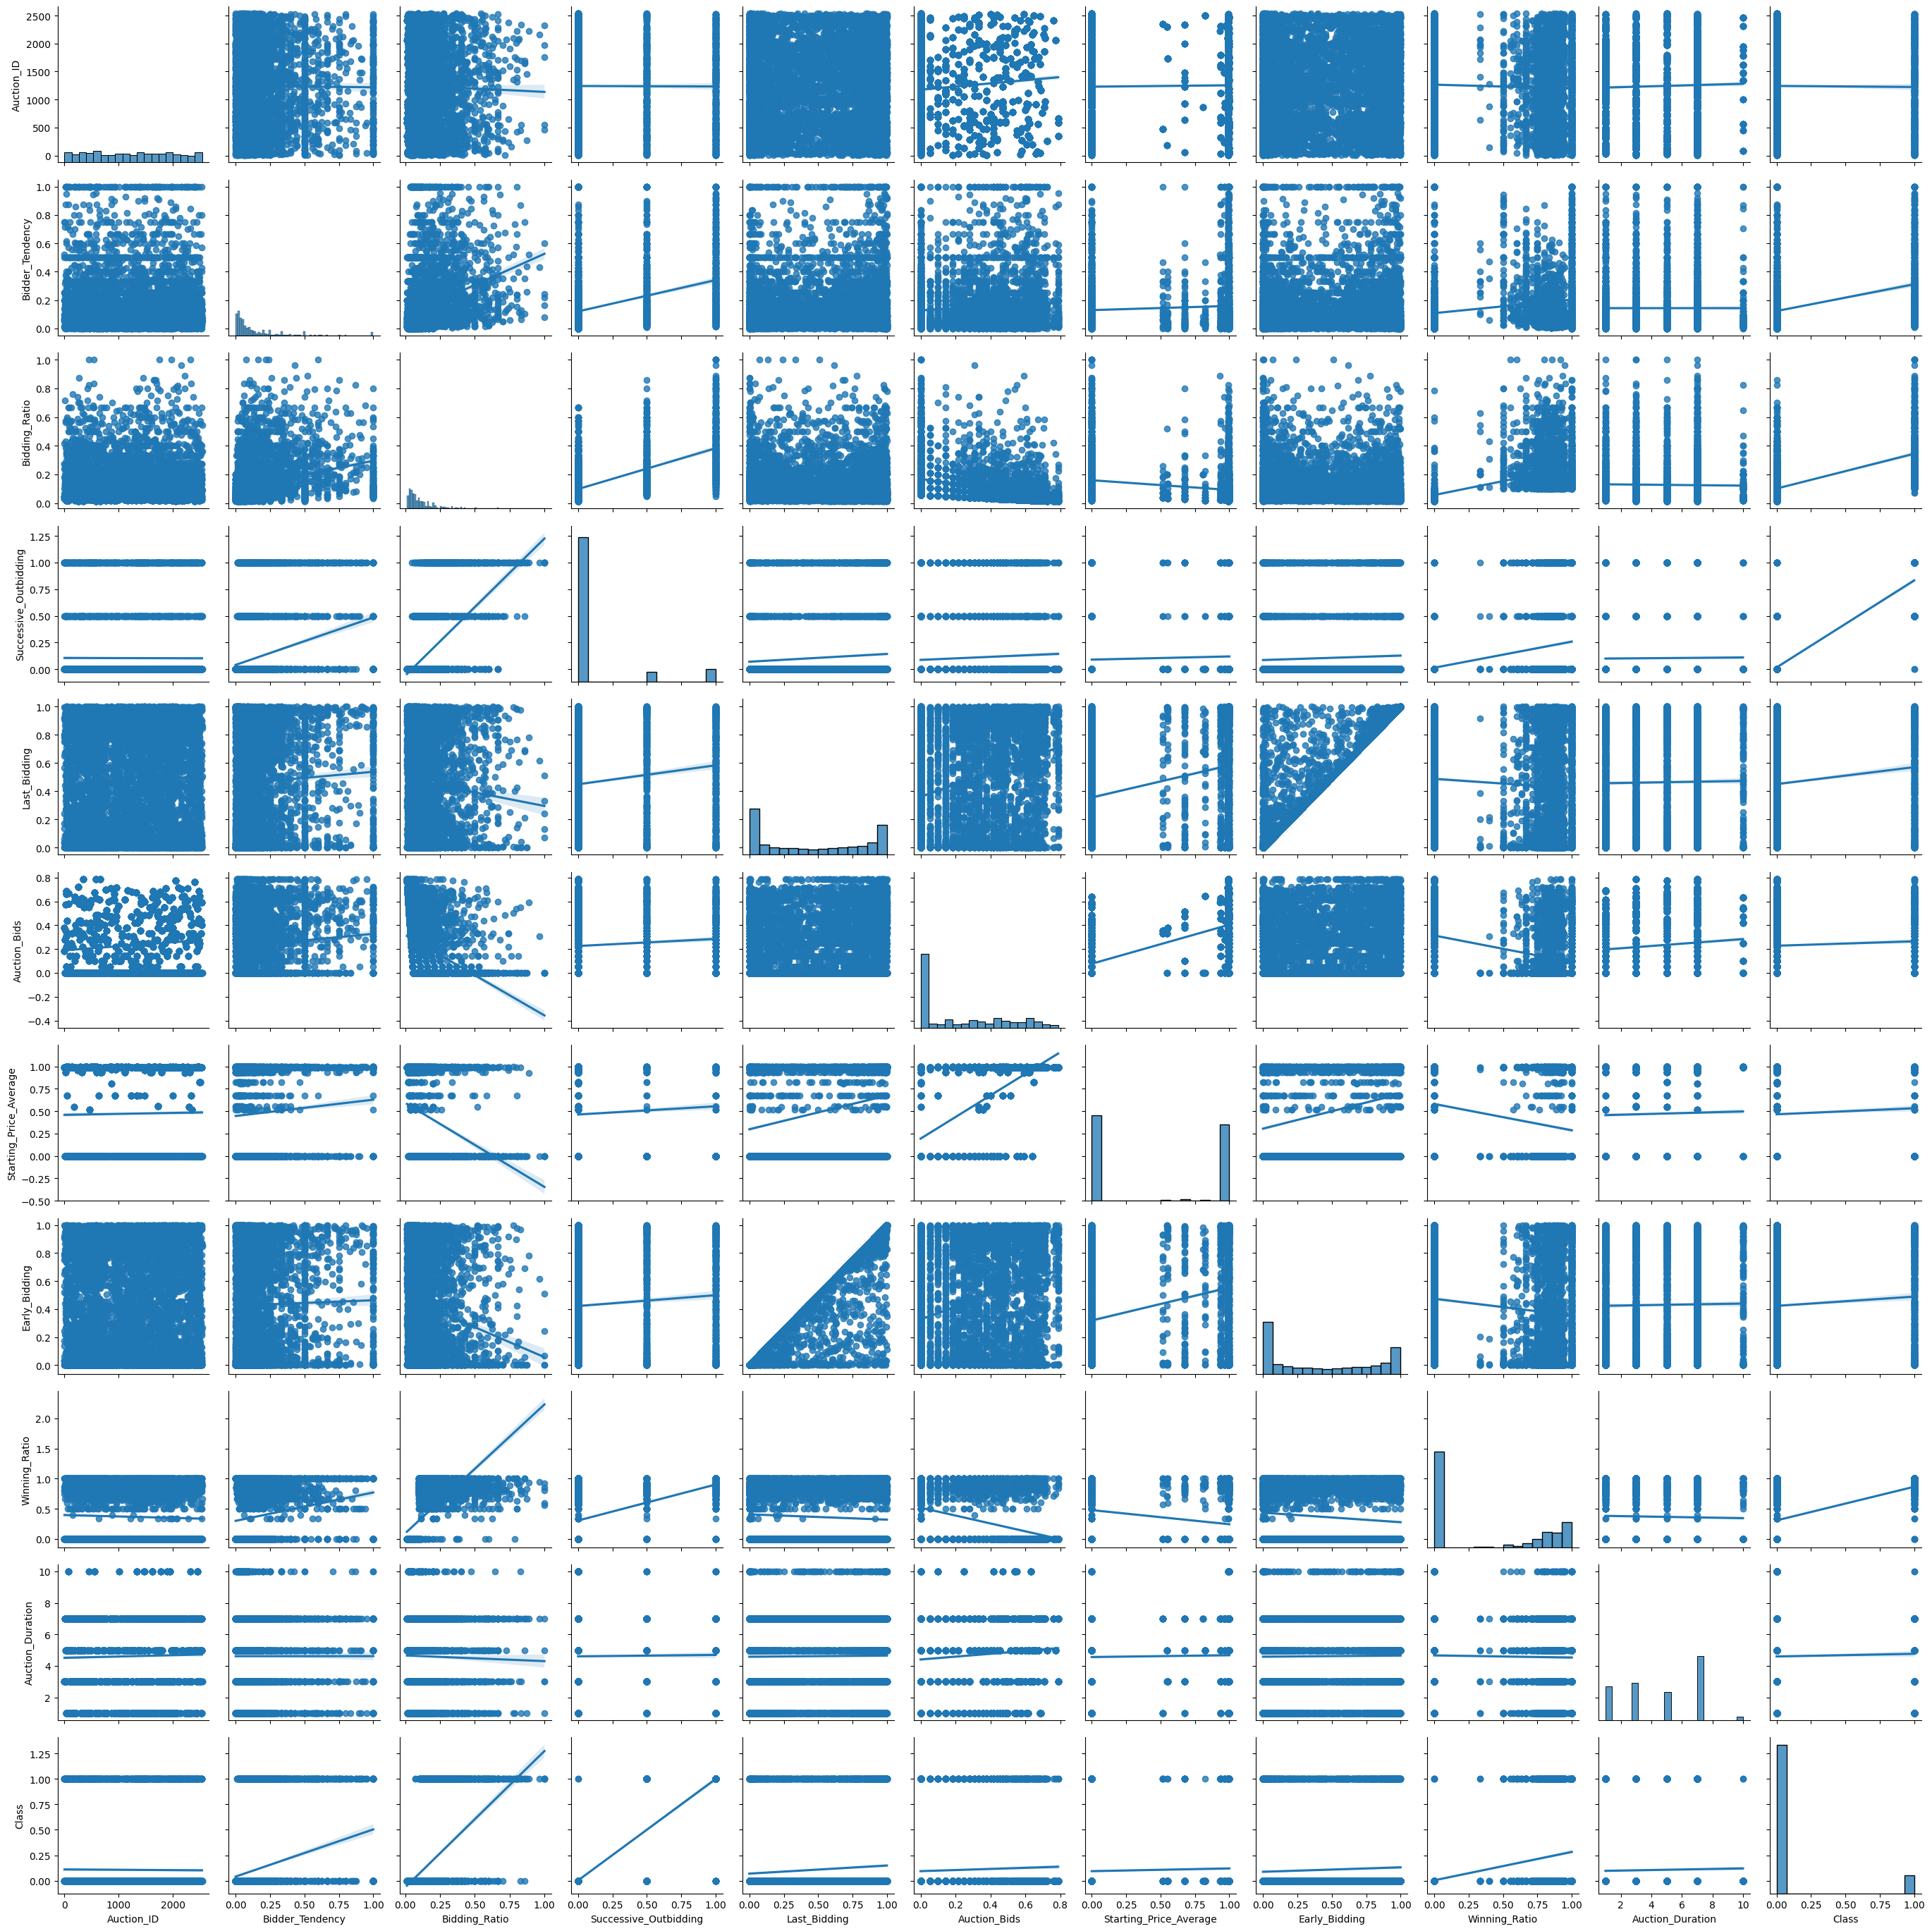

In [17]:
pairplot = sns.pairplot(df_ebay, kind='reg')
plt.tight_layout()
plt.show()

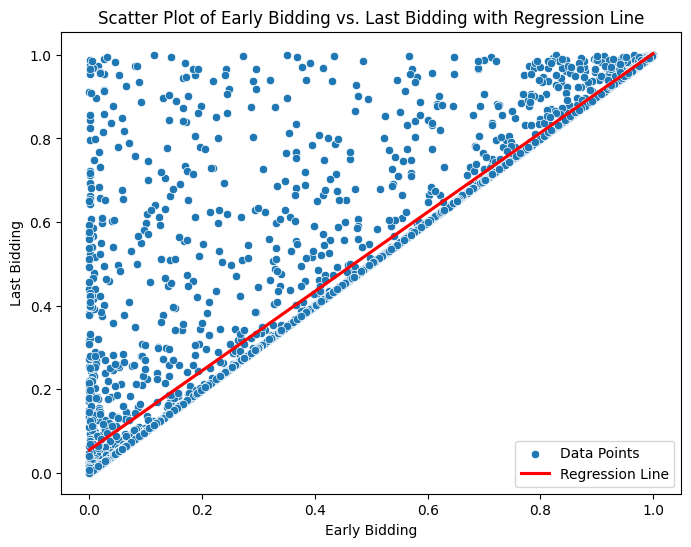

In [18]:
# Create scatter plot with data points
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Early_Bidding', y='Last_Bidding', data=df_ebay, label='Data Points', legend=False)

# Add regression line
sns.regplot(x='Early_Bidding', y='Last_Bidding', data=df_ebay, scatter=False, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Scatter Plot of Early Bidding vs. Last Bidding with Regression Line')
plt.xlabel('Early Bidding')
plt.ylabel('Last Bidding')

# Show legend
plt.legend()

# Show plot
plt.show()

Proportion of auctions with Last Bidding behavior: 0.6790582403965304
Proportion of auctions with Early Bidding behavior: 0.9975216852540273


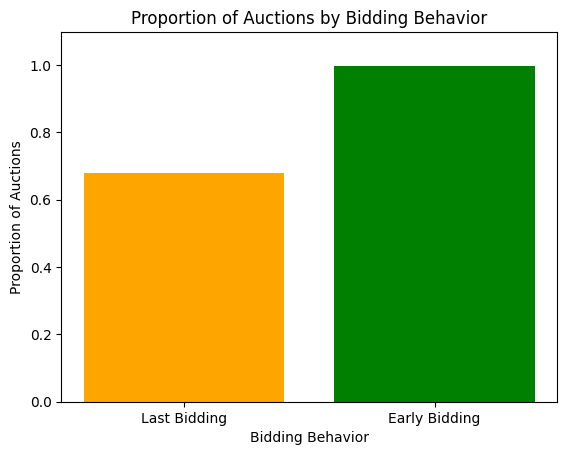

In [19]:
# Last Bidding Analysis

# Identify bidders who become inactive at the last stage of the auction
last_bidding_threshold = 0.9
inactive_bidders_last_bidding = df_ebay[df_ebay['Last_Bidding'] > last_bidding_threshold]['Bidder_ID'].unique()

# Calculate the proportion of auctions with last bidding behavior
proportion_last_bidding = len(inactive_bidders_last_bidding) / len(df_ebay['Auction_ID'].unique())

print("Proportion of auctions with Last Bidding behavior:", proportion_last_bidding)

# Early Bidding Analysis

# Identify bidders who bid early in the auction
early_bidding_threshold = 0.25
early_bidders = df_ebay[df_ebay['Early_Bidding'] < early_bidding_threshold]['Bidder_ID'].unique()

# Calculate the proportion of auctions with early bidding behavior
proportion_early_bidding = len(early_bidders) / len(df_ebay['Auction_ID'].unique())

print("Proportion of auctions with Early Bidding behavior:", proportion_early_bidding)

# Plotting the results
fig, ax = plt.subplots()
proportions = [proportion_last_bidding, proportion_early_bidding]
bidding_behaviors = ['Last Bidding', 'Early Bidding']
ax.bar(bidding_behaviors, proportions, color=['orange', 'green'])

ax.set_xlabel('Bidding Behavior')
ax.set_ylabel('Proportion of Auctions')
ax.set_title('Proportion of Auctions by Bidding Behavior')
ax.set_ylim(0, max(proportions) + 0.1)  # Adjust y-axis to fit the proportions nicely

plt.show()


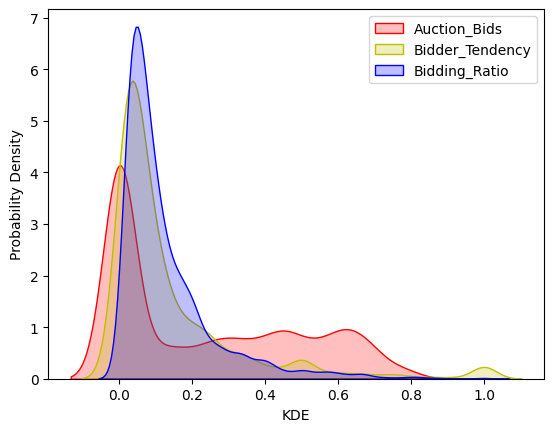

In [20]:
sns.kdeplot(data=df_ebay, x='Auction_Bids', color='r', shade=True, label='Auction_Bids')
sns.kdeplot(data=df_ebay, x='Bidder_Tendency', color='y', shade=True, label='Bidder_Tendency')
sns.kdeplot(data=df_ebay, x='Bidding_Ratio', color='b', shade=True, label='Bidding_Ratio')

plt.xlabel('KDE')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

#### Win Ratio vs Successfull Outbidding

Text(0.5, 0, 'Successive_Outbidding')

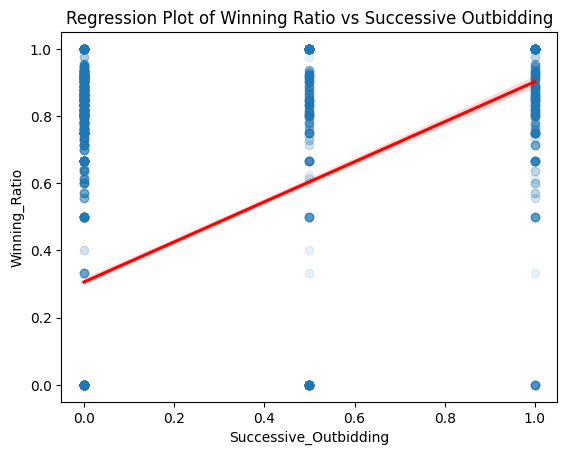

In [21]:
sns.regplot(y='Winning_Ratio', x='Successive_Outbidding', data=df_ebay, logistic=False, scatter_kws={'alpha':0.1}, line_kws={'color': 'red'})
plt.title(f'Regression Plot of Winning Ratio vs Successive Outbidding')
plt.ylabel('Winning_Ratio')
plt.xlabel('Successive_Outbidding')

In [22]:
# Calculate the Pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_ebay['Winning_Ratio'], df_ebay['Successive_Outbidding'])

# Interpretation of the results
print('Analysis between Winning_Ratio and Successive_Outbidding:\n')
print(f'Pearson correlation coefficient: {pearson_coef}')
print(f'P-value: {p_value}\n')

if abs(pearson_coef) >= 0.7:
    print('Correlation Coefficient: Large relationship')
elif 0.3 <= abs(pearson_coef) < 0.7:
    print('Correlation Coefficient: Moderate relationship')
else:
    print('Correlation Coefficient: No significant relationship')

if p_value < 0.001:
    print('P-value: Strong certainty in the result')
elif p_value < 0.05:
    print('P-value: Moderate certainty in the result')
elif p_value < 0.1:
    print('P-value: Weak certainty in the result')
else:
    print('P-value: No certainty in the result')

Analysis between Winning_Ratio and Successive_Outbidding:

Pearson correlation coefficient: 0.38200218375582606
P-value: 9.54333663317236e-219

Correlation Coefficient: Moderate relationship
P-value: Strong certainty in the result


In [23]:
# Spearman correlation
spearman_coef, spearman_p = stats.spearmanr(df_ebay['Winning_Ratio'], df_ebay['Successive_Outbidding'])
print(f'Spearman correlation coefficient: {spearman_coef}, P-value: {spearman_p}')

# Kendall correlation
kendall_coef, kendall_p = stats.kendalltau(df_ebay['Winning_Ratio'], df_ebay['Successive_Outbidding'])
print(f'Kendall correlation coefficient: {kendall_coef}, P-value: {kendall_p}')

Spearman correlation coefficient: 0.3806390374110468, P-value: 4.4713498393606394e-217
Kendall correlation coefficient: 0.3417136941117305, P-value: 6.214901457403434e-202


In [24]:
import statsmodels.api as sm

# Define the independent and dependent variables
X = df_ebay['Successive_Outbidding']
y = df_ebay['Winning_Ratio']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Winning_Ratio   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     1080.
Date:                Sun, 26 May 2024   Prob (F-statistic):          9.54e-219
Time:                        21:21:35   Log-Likelihood:                -3231.2
No. Observations:                6321   AIC:                             6466.
Df Residuals:                    6319   BIC:                             6480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

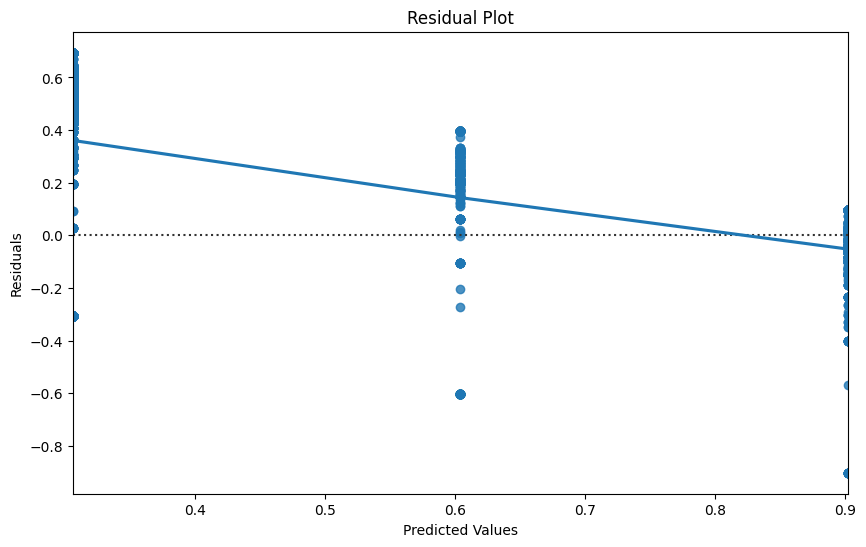

In [25]:
# Predict the values
predictions = model.predict(X)

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=predictions, y=y - predictions, lowess=True)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [26]:
# Group by 'Winning_Ratio' and 'Successive_Outbidding'
grouped_df = df_ebay.groupby(['Class','Successive_Outbidding', 'Winning_Ratio'])['Successive_Outbidding'].count()
grouped_df

Class  Successive_Outbidding  Winning_Ratio
0      0.0                    0.000000         3574
                              0.333333           10
                              0.400000            2
                              0.500000           39
                              0.555556            7
                                               ... 
1      1.0                    0.947368            3
                              0.950000            1
                              0.954545            4
                              0.976744            3
                              1.000000          150
Name: Successive_Outbidding, Length: 229, dtype: int64

In [27]:
filtered_df = df_ebay[(df_ebay['Class']==1) & (df_ebay['Successive_Outbidding']==0)]
filtered_df

Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
Record_ID                                                         
8657               78     g***y              1.0           0.30   
14815             564     2***c              1.0           0.15   

           Successive_Outbidding  Last_Bidding  Auction_Bids  \
Record_ID                                                      
8657                         0.0      0.892831           0.0   
14815                        0.0      0.481683           0.1   

           Starting_Price_Average  Early_Bidding  Winning_Ratio  \
Record_ID                                                         
8657                     0.993528       0.892825            1.0   
14815                    0.000000       0.481628            1.0   

           Auction_Duration  Class  
Record_ID                           
8657                     10      1  
14815                    10      1

In [28]:
filtered_df_2 = df_ebay[(df_ebay['Winning_Ratio']>=0.5) & (df_ebay['Successive_Outbidding']!=0) & (df_ebay['Class']==0)]
filtered_df_2

Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
Record_ID                                                         
314              1610     s***l         0.085714       0.230769   
467              1473     e***8         0.187500       0.136364   
625              1694     0***l         0.111111       0.250000   
997              1892     4***9         0.235294       0.266667   
1097             1439     r***o         0.069767       0.230769   
...               ...       ...              ...            ...   
14447             359     t***e         0.042553       0.153846   
14452             205     2***h         0.857143       0.214286   
14482             359     a***t         0.068182       0.115385   
14679             268     1***i         0.360000       0.209302   
15124             760     q***0         0.625000       0.200000   

           Successive_Outbidding  Last_Bidding  Auction_Bids  \
Record_ID                                                      
314                          0.5      0.668800      0.000000   
467                          0.5      0.287326      0.181818   
625                          0.5      0.507338      0.000000   
997                          0.5      0.767623      0.000000   
1097                         0.5      0.613430      0.000000   
...                          ...           ...           ...   
14447                        0.5      0.015285      0.307692   
14452                        0.5      0.555751      0.357143   
14482                        0.5      0.114919      0.307692   
14679                        0.5      0.995745      0.581395   
15124                        0.5      0.473063      0.280000   

           Starting_Price_Average  Early_Bidding  Winning_Ratio  \
Record_ID                                                         
314                      0.000000       0.668765       1.000000   
467                      0.000000       0.254892       0.666667   
625                      0.000000       0.507292       0.800000   
997                      0.000000       0.767604       0.888889   
1097                     0.993593       0.613410       0.866667   
...                           ...            ...            ...   
14447                    0.000000       0.000046       0.884615   
14452                    0.993593       0.451744       0.500000   
14482                    0.000000       0.114898       1.000000   
14679                    0.993528       0.995382       1.000000   
15124                    0.993593       0.431902       0.500000   

           Auction_Duration  Class  
Record_ID                           
314                       3      0  
467                       3      0  
625                       5      0  
997                       3      0  
1097                      3      0  
...                     ...    ...  
14447                     5      0  
14452                     7      0  
14482                     5      0  
14679                     3      0  
15124                     3      0  

[107 rows x 12 columns]

In [29]:
filtered_df_3 = df_ebay[(df_ebay['Winning_Ratio']<=0.5) & (df_ebay['Successive_Outbidding']!=0) & (df_ebay['Class']==1)]
filtered_df_3

Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
Record_ID                                                         
194               995     p***u         0.750000       0.073171   
471               871     5***_         0.875000       0.225806   
547              1367     v***u         0.333333       0.625000   
838              1323     z***z         0.205128       0.800000   
867                65     y***m         0.315789       0.375000   
1320             2529     p***0         0.800000       0.666667   
1942               43     _***p         1.000000       0.070175   
2020             1392     z***z         0.076923       0.300000   
3108             1759     g***k         0.733333       0.785714   
4948              422     p***e         0.666667       0.800000   
5138             1001     d***.         0.666667       0.352941   
5863             1161     z***z         0.102564       0.190476   
6960             1221     e***2         0.555556       0.625000   
7275             1358     1***9         0.900000       0.473684   
8028              203     j***_         0.588235       0.333333   
9536             1321     v***u         0.666667       0.181818   
9592              531     m***y         0.944444       0.680000   
9620             1484     5***2         0.916667       0.314286   
10375             965     z***z         0.410256       0.421053   
11338            1673     c***k         1.000000       0.095238   
11590            1837     p***r         0.800000       0.285714   
11749             775     a***w         0.769231       0.263158   
12343            1977     y***h         0.600000       0.545455   
13514             922     y***b         0.896552       0.565217   
14602             328     j***_         0.294118       0.312500   

           Successive_Outbidding  Last_Bidding  Auction_Bids  \
Record_ID                                                      
194                          0.5      0.941620      0.560976   
471                          0.5      0.878199      0.419355   
547                          1.0      0.298087      0.000000   
838                          1.0      0.426230      0.000000   
867                          1.0      0.000083      0.000000   
1320                         1.0      0.004132      0.000000   
1942                         1.0      0.709549      0.684211   
2020                         0.5      0.048026      0.000000   
3108                         1.0      0.401181      0.000000   
4948                         1.0      0.000149      0.000000   
5138                         0.5      0.814688      0.000000   
5863                         0.5      0.177145      0.142857   
6960                         1.0      0.384236      0.000000   
7275                         1.0      0.244600      0.052632   
8028                         1.0      0.009745      0.400000   
9536                         1.0      0.038616      0.672727   
9592                         1.0      0.985721      0.280000   
9620                         1.0      0.999195      0.485714   
10375                        0.5      0.957730      0.526316   
11338                        0.5      0.655104      0.571429   
11590                        0.5      0.055661      0.000000   
11749                        0.5      0.907763      0.526316   
12343                        0.5      0.000073      0.000000   
13514                        1.0      0.865220      0.608696   
14602                        0.5      0.728241      0.000000   

           Starting_Price_Average  Early_Bidding  Winning_Ratio  \
Record_ID                                                         
194                      0.993593       0.941397       0.000000   
471                      0.993593       0.876177       0.500000   
547                      0.000000       0.258152       0.500000   
838                      0.000000       0.426203       0.500000   
867                      0.000000       0.000026       0.500000   
132

In [30]:
filtered_df_4 = df_ebay[(df_ebay['Winning_Ratio']==0) & (df_ebay['Successive_Outbidding']!=0) & (df_ebay['Class']==1)]
filtered_df_4

Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
Record_ID                                                         
194               995     p***u         0.750000       0.073171   
1942               43     _***p         1.000000       0.070175   
3108             1759     g***k         0.733333       0.785714   
11338            1673     c***k         1.000000       0.095238   

           Successive_Outbidding  Last_Bidding  Auction_Bids  \
Record_ID                                                      
194                          0.5      0.941620      0.560976   
1942                         1.0      0.709549      0.684211   
3108                         1.0      0.401181      0.000000   
11338                        0.5      0.655104      0.571429   

           Starting_Price_Average  Early_Bidding  Winning_Ratio  \
Record_ID                                                         
194                      0.993593       0.941397            0.0   
1942                     0.993593       0.546481            0.0   
3108                     0.000000       0.025648            0.0   
11338                    0.999935       0.655000            0.0   

           Auction_Duration  Class  
Record_ID                           
194                       3      1  
1942                      1      1  
3108                      1      1  
11338                     1      1

#### Auction Bids:

Average bids per auction (All auctions): 0.23160574843537413
Average bids per auction (Shill bidding auctions): 0.2647969082666667


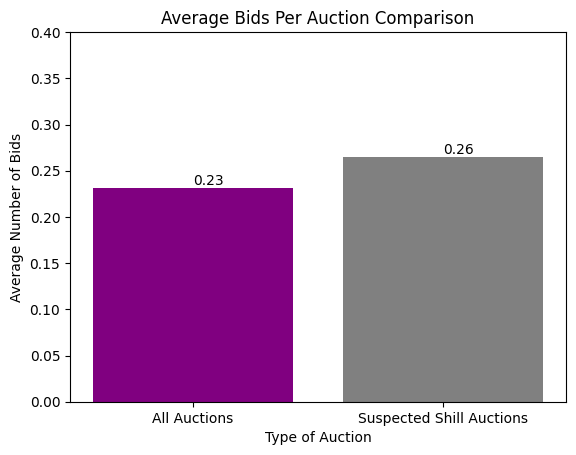

In [31]:
# 1. Identify auctions with suspected shill bidding activities
suspected_shill_auctions = df_ebay[df_ebay['Class'] == 1]

# 2. Calculate the average number of bids per auction
average_bids_per_auction_all = df_ebay['Auction_Bids'].mean()
average_bids_per_auction_suspected_shill = suspected_shill_auctions['Auction_Bids'].mean()

# 3. Compare the averages
print("Average bids per auction (All auctions):", average_bids_per_auction_all)
print("Average bids per auction (Shill bidding auctions):", average_bids_per_auction_suspected_shill)

# Plotting the results
fig, ax = plt.subplots()
averages = [average_bids_per_auction_all, average_bids_per_auction_suspected_shill]
categories = ['All Auctions', 'Suspected Shill Auctions']
bars = ax.bar(categories, averages, color=['purple', 'grey'])

ax.set_xlabel('Type of Auction')
ax.set_ylabel('Average Number of Bids')
ax.set_title('Average Bids Per Auction Comparison')
ax.set_ylim(0, 0.4)  # Set y-axis max to 0.4

# Adding the data labels on each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.show()

#### Bidder Tendency:

In [32]:
df_ebay

Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
Record_ID                                                         
1                 732     _***i         0.200000       0.400000   
2                 732     g***r         0.024390       0.200000   
3                 732     t***p         0.142857       0.200000   
4                 732     7***n         0.100000       0.200000   
5                 900     z***z         0.051282       0.222222   
...               ...       ...              ...            ...   
15129             760     l***t         0.333333       0.160000   
15137            2481     s***s         0.030612       0.130435   
15138            2481     h***t         0.055556       0.043478   
15139            2481     d***d         0.076923       0.086957   
15144            2481     a***l         0.016393       0.043478   

           Successive_Outbidding  Last_Bidding  Auction_Bids  \
Record_ID                                                      
1                            0.0      0.000028      0.000000   
2                            0.0      0.013123      0.000000   
3                            0.0      0.003042      0.000000   
4                            0.0      0.097477      0.000000   
5                            0.0      0.001318      0.000000   
...                          ...           ...           ...   
15129                        1.0      0.738557      0.280000   
15137                        0.0      0.005754      0.217391   
15138                        0.0      0.015663      0.217391   
15139                        0.0      0.068694      0.217391   
15144                        0.0      0.340351      0.217391   

           Starting_Price_Average  Early_Bidding  Winning_Ratio  \
Record_ID                                                         
1                        0.993593       0.000028       0.666667   
2                        0.993593       0.013123       0.944444   
3                        0.993593       0.003042       1.000000   
4                        0.993593       0.097477       1.000000   
5                        0.000000       0.001242       0.500000   
...                           ...            ...            ...   
15129                    0.993593       0.686358       0.888889   
15137                    0.993593       0.000010       0.878788   
15138                    0.993593       0.015663       0.000000   
15139                    0.993593       0.000415       0.000000   
15144                    0.993593       0.340351       0.000000   

           Auction_Duration  Class  
Record_ID                           
1                         5      0  
2                         5      0  
3                         5      0  
4                         5      0  
5                         7      0  
...                     ...    ...  
15129                     3      1  
15137                     7      0  
15138                     7      0  
15139                     7      0  
15144                     7      0  

[6321 rows x 12 columns]

In [33]:
# Identify unique bidders
unique_bidders = df_ebay['Bidder_ID'].unique()

# Calculate the number of auctions per bidder
auctions_per_bidder = df_ebay.groupby('Bidder_ID')['Auction_ID'].nunique()
auctions_per_bidder_sorted = auctions_per_bidder.sort_values(ascending=False)

# Print the results
print("Number of unique bidders:", len(unique_bidders))
print("\nAuctions per bidder:")
print(auctions_per_bidder_sorted)

# Determine Bidder Tendency by calculating the proportion of auctions per bidder with a small number of sellers relative to their total participation
bidder_tendency = auctions_per_bidder / df_ebay['Auction_ID'].nunique()

# Sort Bidder Tendency in descending order
bidder_tendency_sorted = bidder_tendency.sort_values(ascending=False)

# Print the sorted results
print("\nBidder Tendency (Descending Order):")
bidder_tendency_sorted


Number of unique bidders: 1054

Auctions per bidder:
Bidder_ID
a***a    112
n***t     85
e***e     67
i***a     50
r***r     49
        ... 
9***c      1
9***d      1
9***e      1
9***f      1
h***6      1
Name: Auction_ID, Length: 1054, dtype: int64

Bidder Tendency (Descending Order):


Bidder_ID
a***a    0.138786
n***t    0.105328
e***e    0.083024
i***a    0.061958
r***r    0.060719
           ...   
9***c    0.001239
9***d    0.001239
9***e    0.001239
9***f    0.001239
h***6    0.001239
Name: Auction_ID, Length: 1054, dtype: float64

In [34]:
# Merge the bidder tendency with the original DataFrame to include Class information
df_merged = df_ebay.merge(auctions_per_bidder, left_on='Bidder_ID', right_index=True)

# Calculate the number of Class 0 and Class 1 auctions per bidder
class_counts_per_bidder = df_merged.groupby(['Bidder_ID', 'Class'])['Auction_ID_y'].count().unstack(fill_value=0)

# Print the results
print("\nNumber of Class 0 and Class 1 auctions per bidder:")
print(class_counts_per_bidder)


Number of Class 0 and Class 1 auctions per bidder:
Class      0  1
Bidder_ID      
*****      3  0
****h      1  0
****y      1  0
-***-      3  2
-***9      1  0
...       .. ..
z***r      1  0
z***s      1  0
z***v      1  0
z***y      3  2
z***z      6  4

[1054 rows x 2 columns]


In [35]:
# Combine bidder_tendency_sorted, auctions_per_bidder_sorted, and class_counts_per_bidder into one DataFrame
merged_df = pd.DataFrame({
    'Bidder_Tendency': bidder_tendency_sorted,
    'Auctions_Per_Bidder': auctions_per_bidder_sorted,
    'Class_Counts_Class_0': class_counts_per_bidder[0],
    'Class_Counts_Class_1': class_counts_per_bidder[1]
})

# Sort the DataFrame by bidder_tendency in descending order
merged_df = merged_df.sort_values(by='Bidder_Tendency', ascending=False)

# Add a new column for the percentage of Class 1 auctions over total auctions per bidder
merged_df['Class_1_Percentage'] = round((merged_df['Class_Counts_Class_1'] / merged_df['Auctions_Per_Bidder']) * 100,2)

# Print the sorted DataFrame
merged_df

Bidder_Tendency  Auctions_Per_Bidder  Class_Counts_Class_0  \
Bidder_ID                                                               
a***a             0.138786                  112                    88   
n***t             0.105328                   85                    84   
e***e             0.083024                   67                    61   
i***a             0.061958                   50                    45   
r***r             0.060719                   49                    43   
...                    ...                  ...                   ...   
9***c             0.001239                    1                     1   
9***d             0.001239                    1                     1   
9***e             0.001239                    1                     0   
9***f             0.001239                    1                     0   
h***6             0.001239                    1                     1   

           Class_Counts_Class_1  Class_1_Percentage  
Bidder_ID                                            
a***a                        24               21.43  
n***t                         1                1.18  
e***e                         6                8.96  
i***a                         5               10.00  
r***r                         6               12.24  
...                         ...                 ...  
9***c                         0                0.00  
9***d                         0                0.00  
9***e                         1              100.00  
9***f                         1              100.00  
h***6                         0                0.00  

[1054 rows x 5 columns]

In [36]:
# Filter the DataFrame where Class_1_Percentage is not equal to 0 and 100
filtered_df = merged_df[(merged_df['Class_1_Percentage'] != 0) & (merged_df['Class_1_Percentage'] != 100)]

# Sort the filtered DataFrame by Class_1_Percentage in descending order
filtered_df_sorted = filtered_df.sort_values(by='Class_1_Percentage', ascending=False)
filtered_df_sorted


Bidder_Tendency  Auctions_Per_Bidder  Class_Counts_Class_0  \
Bidder_ID                                                               
z***l             0.004957                    4                     1   
u***3             0.004957                    4                     1   
k***j             0.003717                    3                     1   
e***8             0.003717                    3                     1   
h***u             0.003717                    3                     1   
...                    ...                  ...                   ...   
e***r             0.028501                   23                    22   
d***a             0.029740                   24                    23   
0***e             0.035936                   29                    28   
a***l             0.037175                   30                    29   
n***t             0.105328                   85                    84   

           Class_Counts_Class_1  Class_1_Percentage  
Bidder_ID                                            
z***l                         3               75.00  
u***3                         3               75.00  
k***j                         2               66.67  
e***8                         2               66.67  
h***u                         2               66.67  
...                         ...                 ...  
e***r                         1                4.35  
d***a                         1                4.17  
0***e                         1                3.45  
a***l                         1                3.33  
n***t                         1                1.18  

[359 rows x 5 columns]

In [37]:
merged_df['Class_1_Percentage'].describe()

count    1054.000000
mean       10.593681
std        20.303574
min         0.000000
25%         0.000000
50%         0.000000
75%        14.290000
max       100.000000
Name: Class_1_Percentage, dtype: float64

In [38]:
# Count the number of unique bidders
num_unique_bidders = len(df_ebay['Bidder_ID'].unique())

# Print the count
print("Number of unique bidders:", num_unique_bidders)

Number of unique bidders: 1054


In [39]:
# Calculate the total number of auctions per bidder
total_auctions_per_bidder = (class_counts_per_bidder.sum(axis=1)).sort_values(ascending=False)

# Calculate the percentage of Class 1 over the total auctions per bidder
percentage_class1_per_bidder = (class_counts_per_bidder[1] / total_auctions_per_bidder) * 100

# sorting
percentage_class1_per_bidder_sorted = percentage_class1_per_bidder.sort_values(ascending=False)

# Count the number of bidders with percentage_class1_per_bidder > 0
count_percentage_gt_0 = (percentage_class1_per_bidder_sorted > 0).sum()

# Print the count
print("Number of bidders with Class 1:", count_percentage_gt_0)

Number of bidders with Class 1: 386


In [40]:
print(f"Percentage of bidders with Class 1:",round(count_percentage_gt_0/num_unique_bidders*100,2),'%')

Percentage of bidders with Class 1: 36.62 %


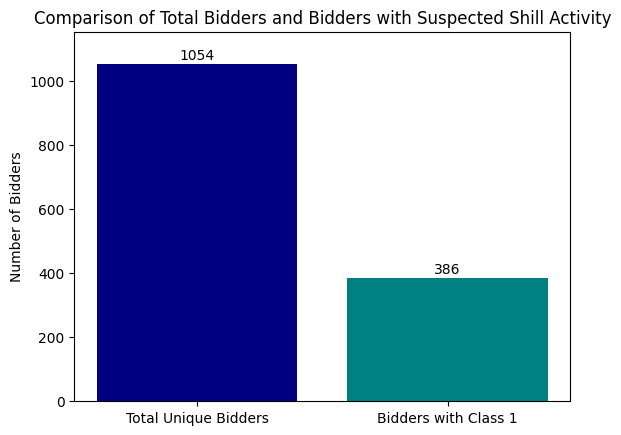

In [41]:
# Plotting the results
fig, ax = plt.subplots()
totals = [num_unique_bidders, count_percentage_gt_0]
categories = ['Total Unique Bidders', 'Bidders with Class 1']
ax.bar(categories, totals, color=['navy', 'teal'])

ax.set_ylabel('Number of Bidders')
ax.set_title('Comparison of Total Bidders and Bidders with Suspected Shill Activity')
ax.set_ylim(0, max(totals) + 100)  # Adjust y-axis to fit the numbers nicely

# Adding the data labels on each bar
for i, v in enumerate(totals):
    ax.text(i, v + 5, str(v), ha='center', va='bottom')

plt.show()

#### Bidding Ratio:

In [42]:
# Count the number of bids placed by each bidder in the dataset
bids_per_bidder = df_ebay.groupby('Bidder_ID')['Auction_Bids'].sum()

# Calculate the total number of auctions participated in by each bidder
auctions_per_bidder = df_ebay.groupby('Bidder_ID')['Auction_ID'].nunique()

# Calculate the average number of bids per auction for each bidder
average_bids_per_auction_bidder = bids_per_bidder / auctions_per_bidder

# Sort the results by Bidding Ratio (average bids per auction)
average_bids_per_auction_bidder_sorted = average_bids_per_auction_bidder.sort_values(ascending=False)

# Compare the bidding activity of each bidder to the overall bidding activity in the dataset
overall_average_bids_per_auction = df_ebay['Auction_Bids'].mean()

# Print the results
print("Average bids per auction (Overall):", overall_average_bids_per_auction)
print("\nBidding Ratio per bidder (Descending order):")
print(average_bids_per_auction_bidder_sorted)


Average bids per auction (Overall): 0.23160574843537413

Bidding Ratio per bidder (Descending order):
Bidder_ID
j***r    0.723077
c***-    0.723077
_***j    0.723077
g***l    0.716265
9***e    0.709677
           ...   
q***_    0.000000
h***.    0.000000
q***1    0.000000
7***g    0.000000
h***6    0.000000
Length: 1054, dtype: float64


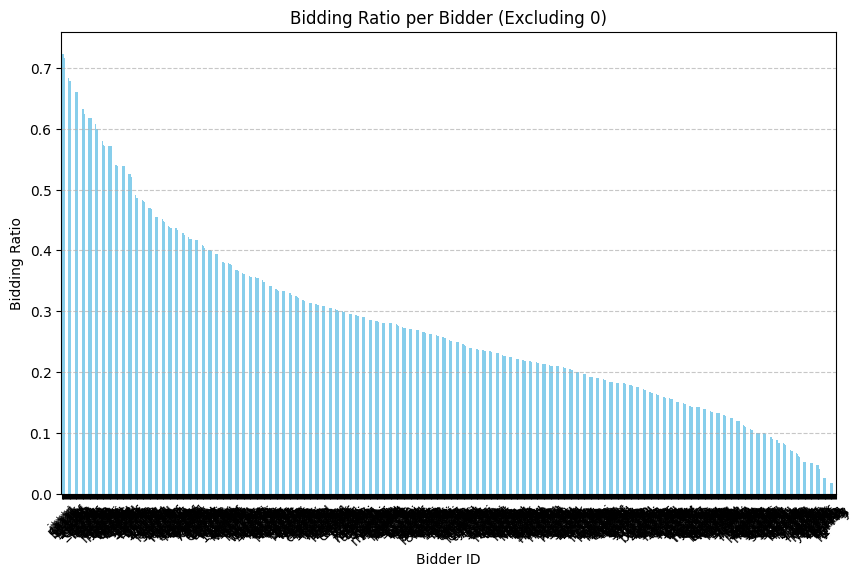

In [43]:
# Filter out the 0 values from the Series
non_zero_bidding_ratio = average_bids_per_auction_bidder_sorted[average_bids_per_auction_bidder_sorted != 0]

# Plot the bidding ratio per user
plt.figure(figsize=(10, 6))
non_zero_bidding_ratio.plot(kind='bar', color='skyblue')
plt.title('Bidding Ratio per Bidder (Excluding 0)')
plt.xlabel('Bidder ID')
plt.ylabel('Bidding Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


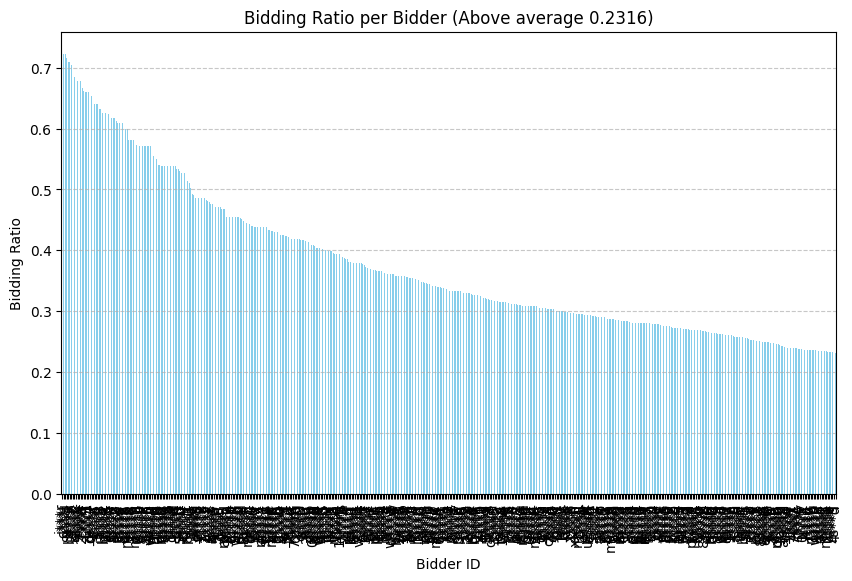

In [44]:
# Filter out the 0 values from the Series
non_zero_bidding_ratio = average_bids_per_auction_bidder_sorted[average_bids_per_auction_bidder_sorted > 0.23160574843537413]

# Plot the bidding ratio per user
plt.figure(figsize=(10, 6))
non_zero_bidding_ratio.plot(kind='bar', color='skyblue')
plt.title('Bidding Ratio per Bidder (Above average 0.2316)')
plt.xlabel('Bidder ID')
plt.ylabel('Bidding Ratio')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [45]:
# Filter for entries where Class = 1
class1_df_ebay = df_ebay[df_ebay['Class'] == 1]

# Count the number of bids placed by each bidder in auctions where Class = 1
bids_per_bidder_class1 = class1_df_ebay.groupby('Bidder_ID')['Auction_Bids'].sum()

# Calculate the total number of auctions participated in by each bidder, for auctions where Class = 1
auctions_per_bidder_class1 = class1_df_ebay.groupby('Bidder_ID')['Auction_ID'].nunique()

# Calculate the average number of bids per auction for each bidder, in auctions where Class = 1
average_bids_per_auction_bidder_class1 = bids_per_bidder_class1 / auctions_per_bidder_class1

# Sort the results by Bidding Ratio (average bids per auction) for auctions where Class = 1
average_bids_per_auction_bidder_sorted_class1 = average_bids_per_auction_bidder_class1.sort_values(ascending=False)

# Compare the bidding activity of each bidder to the overall bidding activity in auctions where Class = 1
overall_average_bids_per_auction_class1 = class1_df_ebay['Auction_Bids'].mean()

# Print the results for Class = 1 auctions
print("Average bids per auction in Class 1 auctions (Overall):", overall_average_bids_per_auction_class1)
print("\nBidding Ratio per bidder in Class 1 auctions (Descending order):")
print(average_bids_per_auction_bidder_sorted_class1)


Average bids per auction in Class 1 auctions (Overall): 0.2647969082666667

Bidding Ratio per bidder in Class 1 auctions (Descending order):
Bidder_ID
1***m    0.788235
b***a    0.725362
e***r    0.723077
2***r    0.723077
d***o    0.714286
           ...   
r***-    0.000000
q***a    0.000000
e***g    0.000000
p***r    0.000000
-***-    0.000000
Length: 386, dtype: float64


In [46]:
average_bids_per_auction_bidder_sorted_class1.describe()

count    386.000000
mean       0.266424
std        0.222058
min        0.000000
25%        0.000000
50%        0.252854
75%        0.437500
max        0.788235
dtype: float64

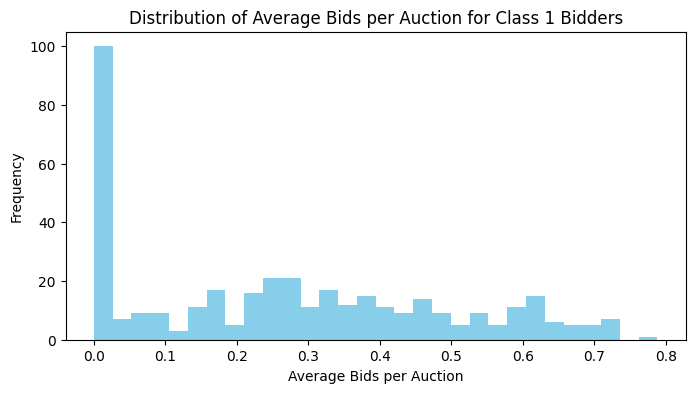

In [47]:
# Histogram
plt.figure(figsize=(8, 4))
plt.hist(average_bids_per_auction_bidder_sorted_class1, bins=30, color='skyblue')
plt.title('Distribution of Average Bids per Auction for Class 1 Bidders')
plt.xlabel('Average Bids per Auction')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

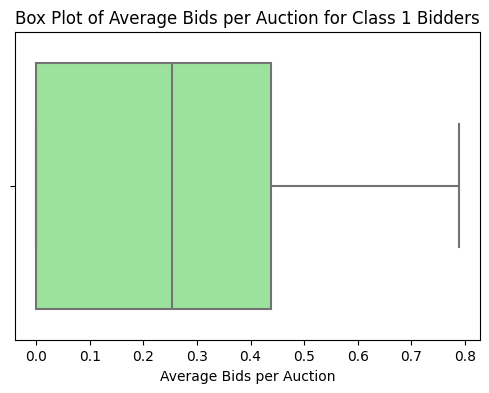

In [48]:
# Box Plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=average_bids_per_auction_bidder_sorted_class1, color='lightgreen')
plt.title('Box Plot of Average Bids per Auction for Class 1 Bidders')
plt.xlabel('Average Bids per Auction')
plt.show()

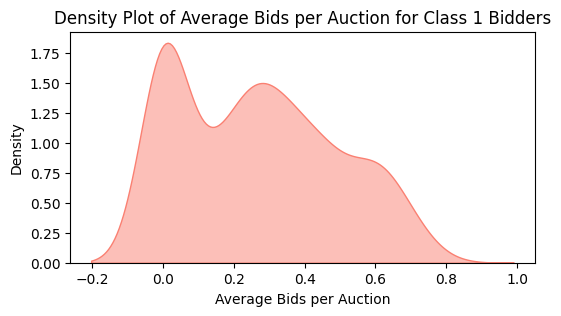

In [49]:
# Density Plot
plt.figure(figsize=(6, 3))
sns.kdeplot(average_bids_per_auction_bidder_sorted_class1, fill=True, color='salmon', alpha=0.5,shade=True)
plt.title('Density Plot of Average Bids per Auction for Class 1 Bidders')
plt.xlabel('Average Bids per Auction')
plt.ylabel('Density')
plt.grid(False)
plt.show()

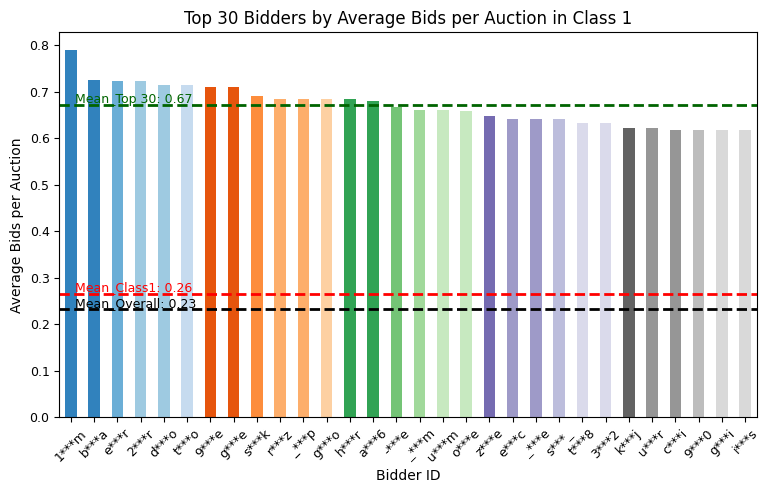

In [50]:
top_bidders = average_bids_per_auction_bidder_sorted_class1.head(30)

# Define the colormap
cmap = plt.get_cmap('tab20c')

# Generate colors from the colormap
colors = cmap(np.linspace(0, 1, len(top_bidders)))

# Calculate the Class 1 bidders' average bids per auction
mean_bids = class1_df_ebay['Auction_Bids'].mean()

overall_mean = df_ebay['Auction_Bids'].mean()

top_bidders_mean = top_bidders.mean()

# Bar Plot for Top 30 Bidders using the colormap
plt.figure(figsize=(9, 5))
top_bidders.plot(kind='bar', color=colors)

# Add a horizontal line for the mean
plt.axhline(y=mean_bids, color='r', linestyle='--', linewidth=2)
plt.axhline(y=overall_mean, color='black', linestyle='--', linewidth=2)
plt.axhline(y=top_bidders_mean, color='darkgreen', linestyle='--', linewidth=2)

plt.title('Top 30 Bidders by Average Bids per Auction in Class 1')
plt.xlabel('Bidder ID')
plt.ylabel('Average Bids per Auction')
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.text(0, mean_bids, f' Mean_Class1: {mean_bids:.2f}', color='red', va='bottom', fontsize=9)
plt.text(0, overall_mean, f' Mean_Overall: {overall_mean:.2f}', color='black', va='bottom', fontsize=9)
plt.text(0, top_bidders_mean, f' Mean_Top 30: {top_bidders_mean:.2f}', color='darkgreen', va='bottom', fontsize=9)
plt.show()


## 1- Preprocessing stage

==> The dataset is all standardized between 0 and 1 apart from Auction_ID and Auction_Duration variables. To keep the same principle, I will standardized both variables using the Min Max Scaller

In [51]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to scale
columns_to_scale = ['Auction_ID', 'Auction_Duration']

# Fit the scaler to the selected columns and transform them
scaled_columns = scaler.fit_transform(df_ebay[columns_to_scale])

# Replace the original columns with the scaled ones
for i, col in enumerate(columns_to_scale):
    df_ebay[col] = scaled_columns[:, i]

df_ebay

Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
Record_ID                                                         
1            0.287011     _***i         0.200000       0.400000   
2            0.287011     g***r         0.024390       0.200000   
3            0.287011     t***p         0.142857       0.200000   
4            0.287011     7***n         0.100000       0.200000   
5            0.353336     z***z         0.051282       0.222222   
...               ...       ...              ...            ...   
15129        0.298066     l***t         0.333333       0.160000   
15137        0.977497     s***s         0.030612       0.130435   
15138        0.977497     h***t         0.055556       0.043478   
15139        0.977497     d***d         0.076923       0.086957   
15144        0.977497     a***l         0.016393       0.043478   

           Successive_Outbidding  Last_Bidding  Auction_Bids  \
Record_ID                                                      
1                            0.0      0.000028      0.000000   
2                            0.0      0.013123      0.000000   
3                            0.0      0.003042      0.000000   
4                            0.0      0.097477      0.000000   
5                            0.0      0.001318      0.000000   
...                          ...           ...           ...   
15129                        1.0      0.738557      0.280000   
15137                        0.0      0.005754      0.217391   
15138                        0.0      0.015663      0.217391   
15139                        0.0      0.068694      0.217391   
15144                        0.0      0.340351      0.217391   

           Starting_Price_Average  Early_Bidding  Winning_Ratio  \
Record_ID                                                         
1                        0.993593       0.000028       0.666667   
2                        0.993593       0.013123       0.944444   
3                        0.993593       0.003042       1.000000   
4                        0.993593       0.097477       1.000000   
5                        0.000000       0.001242       0.500000   
...                           ...            ...            ...   
15129                    0.993593       0.686358       0.888889   
15137                    0.993593       0.000010       0.878788   
15138                    0.993593       0.015663       0.000000   
15139                    0.993593       0.000415       0.000000   
15144                    0.993593       0.340351       0.000000   

           Auction_Duration  Class  
Record_ID                           
1                  0.444444      0  
2                  0.444444      0  
3                  0.444444      0  
4                  0.444444      0  
5                  0.666667      0  
...                     ...    ...  
15129              0.222222      1  
15137              0.666667      0  
15138              0.666667      0  
15139              0.666667      0  
15144              0.666667      0  

[6321 rows x 12 columns]

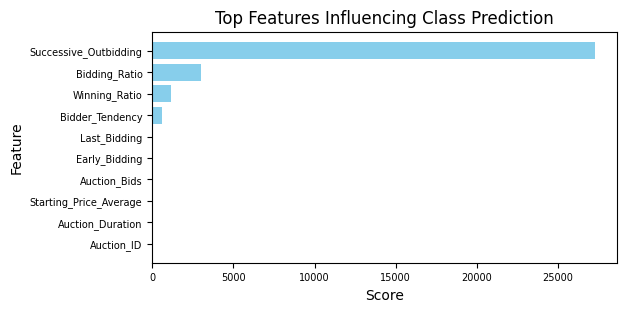

In [52]:
# Initialize SelectKBest
kbest = SelectKBest(score_func=f_regression, k='all') 

# Split your data into features (X) and target variable (y)
X = df_ebay.drop(['Bidder_ID', 'Class'], axis=1)  
y = df_ebay['Class']

# Fit SelectKBest on your features and target variable
kbest.fit(X, y)

# Get the scores of each feature
scores = kbest.scores_

# Sort the features based on their scores
sorted_indices = np.argsort(scores)[::-1]  # Sort in descending order

# Plot the top k features with their scores
top_k = 10  # Change this to the number of top features you want to plot
top_features = X.columns[sorted_indices[:top_k]]
top_scores = scores[sorted_indices[:top_k]]

plt.figure(figsize=(6, 3))
plt.barh(top_features, top_scores, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.title('Top Features Influencing Class Prediction')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.show()

In [53]:
selected_features = ['Successive_Outbidding','Winning_Ratio','Bidding_Ratio','Bidder_Tendency', 'Class']
df_selected_features = df_ebay[selected_features]
df_selected_features

Successive_Outbidding  Winning_Ratio  Bidding_Ratio  \
Record_ID                                                        
1                            0.0       0.666667       0.400000   
2                            0.0       0.944444       0.200000   
3                            0.0       1.000000       0.200000   
4                            0.0       1.000000       0.200000   
5                            0.0       0.500000       0.222222   
...                          ...            ...            ...   
15129                        1.0       0.888889       0.160000   
15137                        0.0       0.878788       0.130435   
15138                        0.0       0.000000       0.043478   
15139                        0.0       0.000000       0.086957   
15144                        0.0       0.000000       0.043478   

           Bidder_Tendency  Class  
Record_ID                          
1                 0.200000      0  
2                 0.024390      0  
3                 0.142857      0  
4                 0.100000      0  
5                 0.051282      0  
...                    ...    ...  
15129             0.333333      1  
15137             0.030612      0  
15138             0.055556      0  
15139             0.076923      0  
15144             0.016393      0  

[6321 rows x 5 columns]

# 2- Classifier models

In [54]:
def evaluate_classifiers(models, X_train, y_train, X_test, y_test):
    results = {}
    num_classifiers = len(models)
    fig, axes = plt.subplots(1, num_classifiers, figsize=(15, 5))
    
    for i, (name, model) in enumerate(models.items()):
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate evaluation metrics
        accuracy = round(accuracy_score(y_test, y_pred), 3)
        precision = round(precision_score(y_test, y_pred), 3)
        recall = round(recall_score(y_test, y_pred), 3)
        f1 = round(f1_score(y_test, y_pred), 3)
        roc_auc = round(roc_auc_score(y_test, y_pred), 3)
        
        results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}
        
        # Plot ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)

        axes[i].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axes[i].set_xlim([0.0, 1.0])
        axes[i].set_ylim([0.0, 1.05])
        axes[i].set_xlabel('False Positive Rate')
        axes[i].set_ylabel('True Positive Rate')
        axes[i].set_title(f'ROC Curve - {name}')
        axes[i].legend(loc="lower right")
        
    plt.tight_layout()
    plt.show()
    
    return results

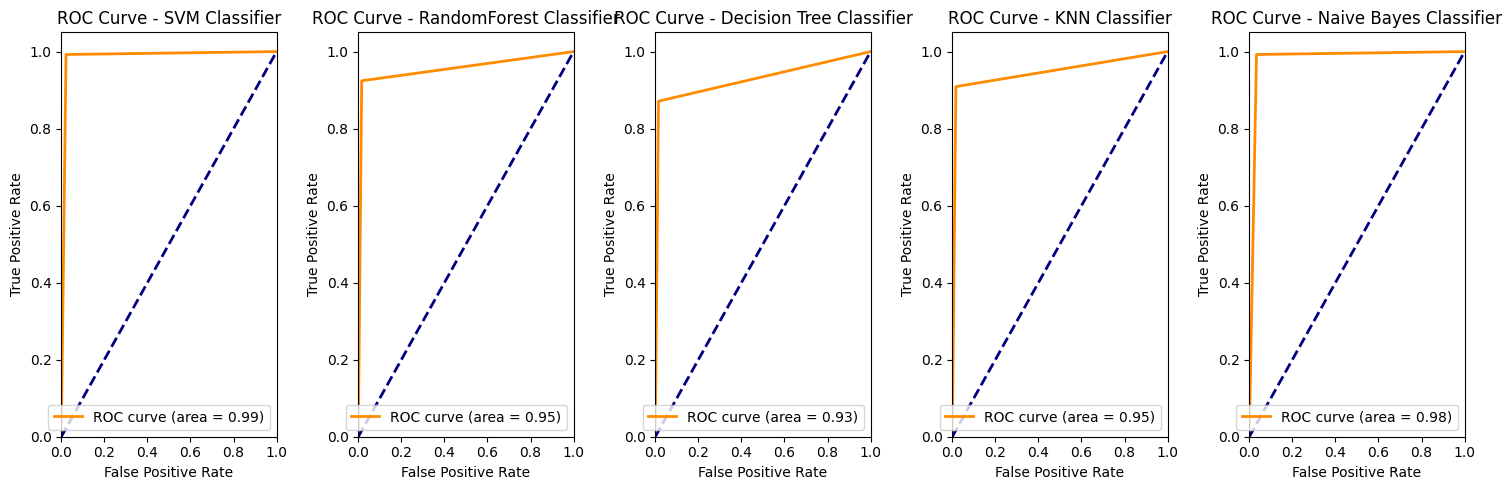

Accuracy  Precision  Recall  F1 Score  ROC AUC
SVM Classifier               0.979      0.840   0.992     0.910    0.985
RandomForest Classifier      0.978      0.871   0.924     0.897    0.954
Decision Tree Classifier     0.973      0.871   0.871     0.871    0.928
KNN Classifier               0.975      0.863   0.909     0.886    0.946
Naive Bayes Classifier       0.969      0.775   0.992     0.870    0.979

In [55]:
# we select which ones will be X and which will be my y variable
X = df_selected_features.iloc[:,:-1].values
y = df_selected_features.iloc[:,-1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
classifiers = {
    'SVM Classifier': SVC(),
    'RandomForest Classifier': RandomForestClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'KNN Classifier': KNeighborsClassifier(),
    'Naive Bayes Classifier': GaussianNB()
}

# Evaluate the classifiers
results = evaluate_classifiers(classifiers, X_train, y_train, X_test, y_test)

# Convert results dictionary to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')

results_df

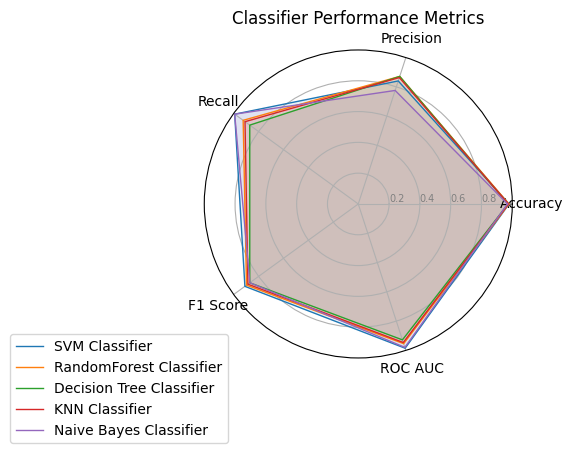

In [56]:
from math import pi

# Function to create radar chart
def plot_radar_chart(df):
    categories = list(df.columns)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variables)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))

    # Loop to plot each classifier
    for index, row in df.iterrows():
        values = row.values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=index)
        ax.fill(angles, values, alpha=0.1)

    # Add labels
    plt.xticks(angles[:-1], categories)
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
    plt.ylim(0, 1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.title('Classifier Performance Metrics')
    plt.show()

# Plot radar chart
plot_radar_chart(results_df)

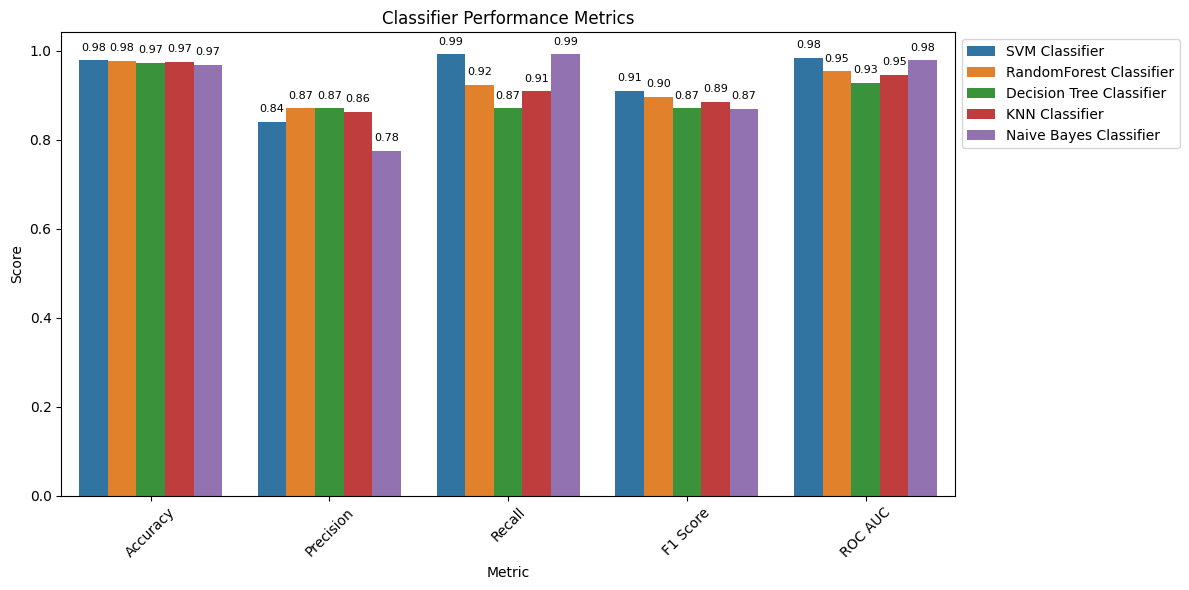

In [57]:
# Convert the DataFrame to long format for easier plotting
results_long = results_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')

# Rename 'index' column to 'Classifier'
results_long.rename(columns={'index': 'Classifier'}, inplace=True)

# Create a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Metric', y='Score', hue='Classifier', data=results_long)

# Add values on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points', fontsize = 8)

# Adjust the legend to be outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Classifier Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
def select_best_models(results, metric='Accuracy', top_n=3):
    # Check if the specified metric is valid
    valid_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
    if metric not in valid_metrics:
        raise ValueError("Invalid metric. Please choose one of {'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'}.")

    # Results is a tuple, unpack them
    if isinstance(results, tuple):
        model_names, model_results = results
        results_dict = dict(zip(model_names, model_results))
    else:
        results_dict = results

    # Sort the results dictionary based on the specified metric
    sorted_results = sorted(results_dict.items(), key=lambda x: x[1][metric], reverse=True)

    # Get the names of the top n models
    top_models = [model[0] for model in sorted_results[:top_n]]

    return top_models

if isinstance(results, tuple):
    model_names, model_results = results
    results_dict = dict(zip(model_names, model_results))
else:
    results_dict = results
        
# Select the top 3 models based on accuracy
top_models_acc = select_best_models(results_dict, metric='Accuracy', top_n=3)
print("Top 3 models based on accuracy:", top_models_acc)

# Select the top 3 models based on ROC AUC
top_models_roc_auc = select_best_models(results_dict, metric='ROC AUC', top_n=3)
print("Top 3 models based on ROC AUC:", top_models_roc_auc)


Top 3 models based on accuracy: ['SVM Classifier', 'RandomForest Classifier', 'KNN Classifier']
Top 3 models based on ROC AUC: ['SVM Classifier', 'Naive Bayes Classifier', 'RandomForest Classifier']


In [59]:
df_selected_features

Successive_Outbidding  Winning_Ratio  Bidding_Ratio  \
Record_ID                                                        
1                            0.0       0.666667       0.400000   
2                            0.0       0.944444       0.200000   
3                            0.0       1.000000       0.200000   
4                            0.0       1.000000       0.200000   
5                            0.0       0.500000       0.222222   
...                          ...            ...            ...   
15129                        1.0       0.888889       0.160000   
15137                        0.0       0.878788       0.130435   
15138                        0.0       0.000000       0.043478   
15139                        0.0       0.000000       0.086957   
15144                        0.0       0.000000       0.043478   

           Bidder_Tendency  Class  
Record_ID                          
1                 0.200000      0  
2                 0.024390      0  
3                 0.142857      0  
4                 0.100000      0  
5                 0.051282      0  
...                    ...    ...  
15129             0.333333      1  
15137             0.030612      0  
15138             0.055556      0  
15139             0.076923      0  
15144             0.016393      0  

[6321 rows x 5 columns]

### RandomForest Classifier

Accuracy RF Selected Features: 0.9753320683111955
Precision RF Selected Features: 0.8529411764705882
Recall RF Selected Features: 0.9119496855345912
F1 Score RF Selected Features: 0.8814589665653494
Specificity RF Selected Features: 0.9824191279887482

Confusion Matrix:
 [[1397   25]
 [  14  145]]


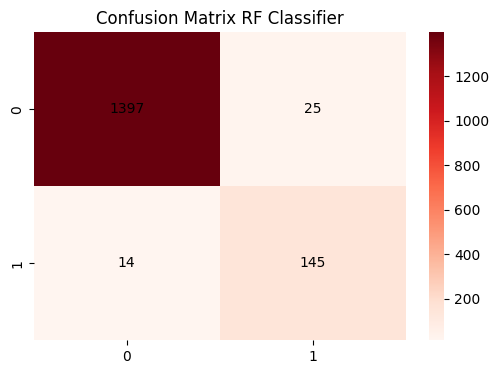

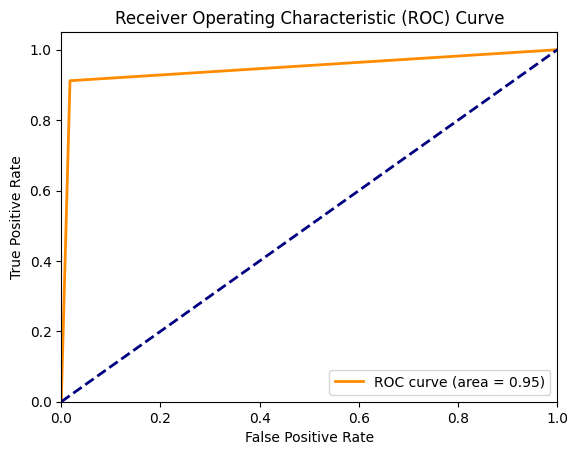

In [60]:
X = df_selected_features.iloc[:,:-1].values
y = df_selected_features.iloc[:,-1].values

# for classification models, we split the training with 25% instead of 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

# feature scaling for all classifier models

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# n_estimators is the number of trees you want to use for the model usually between 10 and 15.
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# compare and test results of y

y_pred = classifier.predict(X_test)

# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

# visualize the confusion matrix

plt.figure(figsize=(6,4))
sns.heatmap(cm, fmt = 'd', cmap = 'Reds')
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j+0.5, i+0.5, cm[i, j], ha='center', va='center', color='black', fontsize=10)
plt.title('Confusion Matrix RF Classifier')


# Accuracy
accuracy_RF_selected_set = accuracy_score(y_test, y_pred)
print("Accuracy RF Selected Features:", accuracy_RF_selected_set)

# Precision
precision_RF_selected_set = precision_score(y_test, y_pred)
print("Precision RF Selected Features:", precision_RF_selected_set)

# Recall (Sensitivity)
recall_RF_selected_set = recall_score(y_test, y_pred)
print("Recall RF Selected Features:", recall_RF_selected_set)

# F1 Score
f1_RF_selected_set = f1_score(y_test, y_pred)
print("F1 Score RF Selected Features:", f1_RF_selected_set)

# Specificity
specificity_RF_selected_set = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Specificity RF Selected Features:", specificity_RF_selected_set)

print(f'\nConfusion Matrix:\n',cm)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




### SVM Classifier

Accuracy SVM Classifier: 0.9791271347248577
Precision SVM Classifier: 0.8315789473684211
Recall SVM Classifier: 0.9937106918238994
F1 Score SVM Classifier: 0.9054441260744985
Specificity SVM Classifier: 0.9774964838255977

Confusion Matrix:
 [[1390   32]
 [   1  158]]


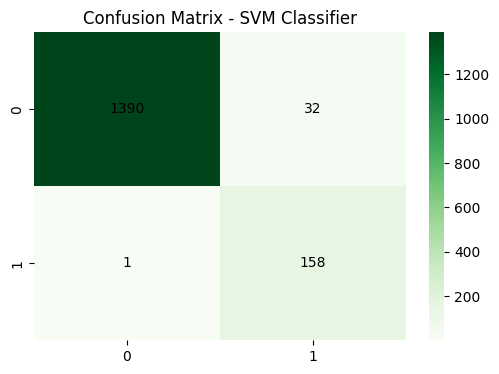

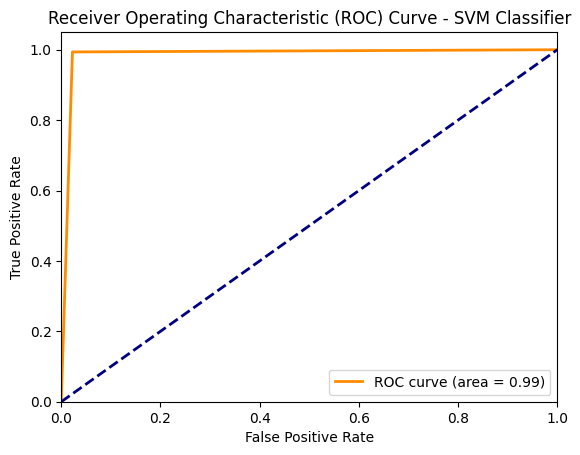

In [61]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SVM Classifier
classifier_svm = SVC(kernel='linear', random_state=0)
classifier_svm.fit(X_train, y_train)

# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, fmt='d', cmap='Greens')
for i in range(len(cm_svm)):
    for j in range(len(cm_svm)):
        plt.text(j+0.5, i+0.5, cm_svm[i, j], ha='center', va='center', color='black', fontsize=10)
plt.title('Confusion Matrix - SVM Classifier')

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy SVM Classifier:", accuracy_svm)

# Precision
precision_svm = precision_score(y_test, y_pred_svm)
print("Precision SVM Classifier:", precision_svm)

# Recall (Sensitivity)
recall_svm = recall_score(y_test, y_pred_svm)
print("Recall SVM Classifier:", recall_svm)

# F1 Score
f1_svm = f1_score(y_test, y_pred_svm)
print("F1 Score SVM Classifier:", f1_svm)

# Specificity
specificity_svm = cm_svm[0, 0] / (cm_svm[0, 0] + cm_svm[0, 1])
print("Specificity SVM Classifier:", specificity_svm)

print(f'\nConfusion Matrix:\n',cm_svm)

# ROC Curve and AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM Classifier')
plt.legend(loc="lower right")
plt.show()


# 3- Clustering models

In [62]:
df_selected_features

Successive_Outbidding  Winning_Ratio  Bidding_Ratio  \
Record_ID                                                        
1                            0.0       0.666667       0.400000   
2                            0.0       0.944444       0.200000   
3                            0.0       1.000000       0.200000   
4                            0.0       1.000000       0.200000   
5                            0.0       0.500000       0.222222   
...                          ...            ...            ...   
15129                        1.0       0.888889       0.160000   
15137                        0.0       0.878788       0.130435   
15138                        0.0       0.000000       0.043478   
15139                        0.0       0.000000       0.086957   
15144                        0.0       0.000000       0.043478   

           Bidder_Tendency  Class  
Record_ID                          
1                 0.200000      0  
2                 0.024390      0  
3                 0.142857      0  
4                 0.100000      0  
5                 0.051282      0  
...                    ...    ...  
15129             0.333333      1  
15137             0.030612      0  
15138             0.055556      0  
15139             0.076923      0  
15144             0.016393      0  

[6321 rows x 5 columns]

### Hierarchical Clustering

#### with all dataset

In [63]:
df_ebay.drop(columns=['Bidder_ID'])

Auction_ID  Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  \
Record_ID                                                                      
1            0.287011         0.200000       0.400000                    0.0   
2            0.287011         0.024390       0.200000                    0.0   
3            0.287011         0.142857       0.200000                    0.0   
4            0.287011         0.100000       0.200000                    0.0   
5            0.353336         0.051282       0.222222                    0.0   
...               ...              ...            ...                    ...   
15129        0.298066         0.333333       0.160000                    1.0   
15137        0.977497         0.030612       0.130435                    0.0   
15138        0.977497         0.055556       0.043478                    0.0   
15139        0.977497         0.076923       0.086957                    0.0   
15144        0.977497         0.016393       0.043478                    0.0   

           Last_Bidding  Auction_Bids  Starting_Price_Average  Early_Bidding  \
Record_ID                                                                      
1              0.000028      0.000000                0.993593       0.000028   
2              0.013123      0.000000                0.993593       0.013123   
3              0.003042      0.000000                0.993593       0.003042   
4              0.097477      0.000000                0.993593       0.097477   
5              0.001318      0.000000                0.000000       0.001242   
...                 ...           ...                     ...            ...   
15129          0.738557      0.280000                0.993593       0.686358   
15137          0.005754      0.217391                0.993593       0.000010   
15138          0.015663      0.217391                0.993593       0.015663   
15139          0.068694      0.217391                0.993593       0.000415   
15144          0.340351      0.217391                0.993593       0.340351   

           Winning_Ratio  Auction_Duration  Class  
Record_ID                                          
1               0.666667          0.444444      0  
2               0.944444          0.444444      0  
3               1.000000          0.444444      0  
4               1.000000          0.444444      0  
5               0.500000          0.666667      0  
...                  ...               ...    ...  
15129           0.888889          0.222222      1  
15137           0.878788          0.666667      0  
15138           0.000000          0.666667      0  
15139           0.000000          0.666667      0  
15144           0.000000          0.666667      0  

[6321 rows x 11 columns]

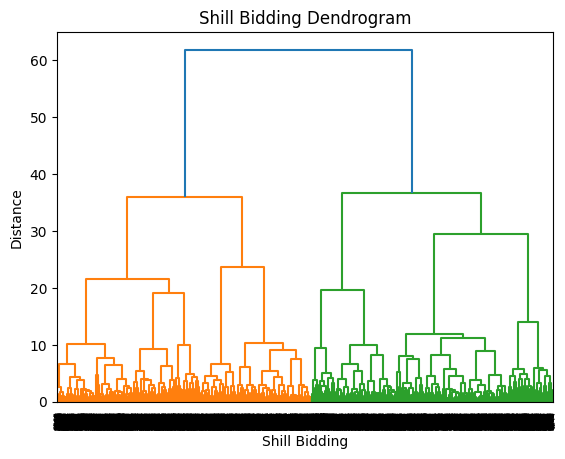

In [64]:
# we define the X

X = df_ebay.drop(columns=['Bidder_ID']).iloc[:,:-1].values

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Shill Bidding Dendrogram')
plt.xlabel('Shill Bidding')
plt.ylabel('Distance')
plt.show()

In [65]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Set the range of clusters you want to try
min_clusters = 2
max_clusters = 15
results = []

for n_clusters in range(min_clusters, max_clusters + 1):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    results.append((n_clusters, silhouette_avg))

# Print silhouette scores
for n_clusters, silhouette_avg in results:
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.2f}")



For n_clusters = 2, the average silhouette score is 0.28
For n_clusters = 3, the average silhouette score is 0.24
For n_clusters = 4, the average silhouette score is 0.26
For n_clusters = 5, the average silhouette score is 0.28
For n_clusters = 6, the average silhouette score is 0.26
For n_clusters = 7, the average silhouette score is 0.26
For n_clusters = 8, the average silhouette score is 0.27
For n_clusters = 9, the average silhouette score is 0.28
For n_clusters = 10, the average silhouette score is 0.29
For n_clusters = 11, the average silhouette score is 0.25
For n_clusters = 12, the average silhouette score is 0.24
For n_clusters = 13, the average silhouette score is 0.21
For n_clusters = 14, the average silhouette score is 0.18
For n_clusters = 15, the average silhouette score is 0.18


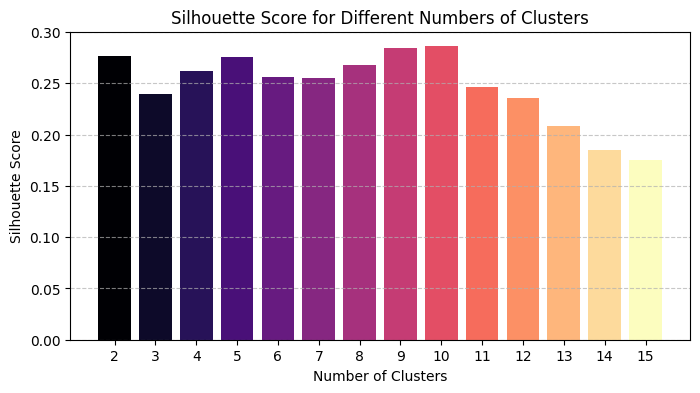

In [66]:
# Extracting number of clusters and silhouette scores
n_clusters = [result[0] for result in results]
silhouette_scores = [result[1] for result in results]

# Plotting the results
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(n_clusters, silhouette_scores, color=plt.cm.magma(np.linspace(0, 1, len(n_clusters))))
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Score for Different Numbers of Clusters')
ax.set_xticks(n_clusters)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### with selected k best features

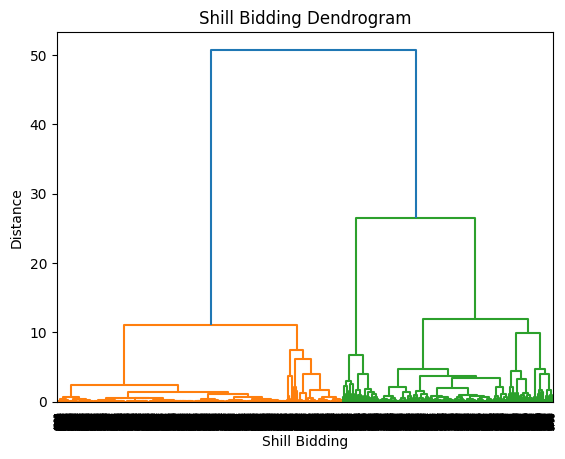

In [67]:
# we define the X

X = df_selected_features.iloc[:,:-1].values

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Shill Bidding Dendrogram')
plt.xlabel('Shill Bidding')
plt.ylabel('Distance')
plt.show()

In [68]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Set the range of clusters you want to try
min_clusters = 2
max_clusters = 10
results = []

for n_clusters in range(min_clusters, max_clusters + 1):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    results.append((n_clusters, silhouette_avg))

# Print silhouette scores
for n_clusters, silhouette_avg in results:
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.2f}")



For n_clusters = 2, the average silhouette score is 0.68
For n_clusters = 3, the average silhouette score is 0.72
For n_clusters = 4, the average silhouette score is 0.69
For n_clusters = 5, the average silhouette score is 0.61
For n_clusters = 6, the average silhouette score is 0.61
For n_clusters = 7, the average silhouette score is 0.62
For n_clusters = 8, the average silhouette score is 0.62
For n_clusters = 9, the average silhouette score is 0.63
For n_clusters = 10, the average silhouette score is 0.62


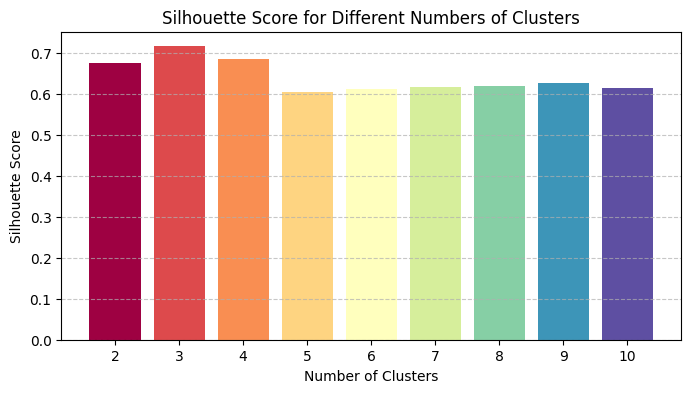

In [69]:
# Extracting number of clusters and silhouette scores
n_clusters = [result[0] for result in results]
silhouette_scores = [result[1] for result in results]

# Plotting the results
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(n_clusters, silhouette_scores, color=plt.cm.Spectral(np.linspace(0, 1, len(n_clusters))))
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Score for Different Numbers of Clusters')
ax.set_xticks(n_clusters)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [70]:
# we need to train the model
from sklearn.cluster import AgglomerativeClustering

h_clus = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y = h_clus.fit_predict(X)

# Append the y into the dataset
df_selected_features['Class_Type_Hierar_Clust'] = y
df_selected_features

Successive_Outbidding  Winning_Ratio  Bidding_Ratio  \
Record_ID                                                        
1                            0.0       0.666667       0.400000   
2                            0.0       0.944444       0.200000   
3                            0.0       1.000000       0.200000   
4                            0.0       1.000000       0.200000   
5                            0.0       0.500000       0.222222   
...                          ...            ...            ...   
15129                        1.0       0.888889       0.160000   
15137                        0.0       0.878788       0.130435   
15138                        0.0       0.000000       0.043478   
15139                        0.0       0.000000       0.086957   
15144                        0.0       0.000000       0.043478   

           Bidder_Tendency  Class  Class_Type_Hierar_Clust  
Record_ID                                                   
1                 0.200000      0                        0  
2                 0.024390      0                        0  
3                 0.142857      0                        0  
4                 0.100000      0                        0  
5                 0.051282      0                        0  
...                    ...    ...                      ...  
15129             0.333333      1                        2  
15137             0.030612      0                        0  
15138             0.055556      0                        1  
15139             0.076923      0                        1  
15144             0.016393      0                        1  

[6321 rows x 6 columns]

In [71]:
df_selected_features['Class_Type_Hierar_Clust'].value_counts()

Class_Type_Hierar_Clust
1    3651
0    2214
2     456
Name: count, dtype: int64

In [72]:
df_suspicious_class_not_equal = df_selected_features[(df_selected_features['Class'] == 0) & (df_selected_features['Class_Type_Hierar_Clust'] != 0)]
df_suspicious_class_not_equal


Successive_Outbidding  Winning_Ratio  Bidding_Ratio  \
Record_ID                                                        
39                           0.0            0.0       0.052632   
43                           0.0            0.0       0.041667   
44                           0.0            0.0       0.041667   
45                           0.0            0.0       0.041667   
46                           0.0            0.0       0.041667   
...                          ...            ...            ...   
15124                        0.5            0.5       0.200000   
15128                        0.0            0.0       0.040000   
15138                        0.0            0.0       0.043478   
15139                        0.0            0.0       0.086957   
15144                        0.0            0.0       0.043478   

           Bidder_Tendency  Class  Class_Type_Hierar_Clust  
Record_ID                                                   
39                0.017241      0                        1  
43                0.142857      0                        1  
44                0.007246      0                        1  
45                0.010000      0                        1  
46                0.025641      0                        1  
...                    ...    ...                      ...  
15124             0.625000      0                        1  
15128             0.022222      0                        1  
15138             0.055556      0                        1  
15139             0.076923      0                        1  
15144             0.016393      0                        1  

[3646 rows x 6 columns]

In [73]:
df_class1_to_class2 = df_selected_features[(df_selected_features['Class'] == 1) & (df_selected_features['Class_Type_Hierar_Clust'] == 2)]
df_class1_to_class2


Successive_Outbidding  Winning_Ratio  Bidding_Ratio  \
Record_ID                                                        
12                           1.0       1.000000       0.444444   
13                           1.0       0.944444       0.185185   
37                           1.0       0.600000       0.562500   
40                           1.0       0.818182       0.208333   
53                           1.0       0.933333       0.185185   
...                          ...            ...            ...   
15024                        1.0       1.000000       0.140000   
15047                        1.0       0.941176       0.343750   
15052                        1.0       1.000000       0.740741   
15060                        1.0       0.857143       0.615385   
15129                        1.0       0.888889       0.160000   

           Bidder_Tendency  Class  Class_Type_Hierar_Clust  
Record_ID                                                   
12                0.137931      1                        2  
13                0.121951      1                        2  
37                0.600000      1                        2  
40                0.041322      1                        2  
53                0.172414      1                        2  
...                    ...    ...                      ...  
15024             0.700000      1                        2  
15047             0.239130      1                        2  
15052             0.281690      1                        2  
15060             0.592593      1                        2  
15129             0.333333      1                        2  

[450 rows x 6 columns]

In [74]:
df_class_1_to_class_0 = df_selected_features[(df_selected_features['Class'] == 1) & (df_selected_features['Class_Type_Hierar_Clust'] == 0)]
df_class_1_to_class_0


Successive_Outbidding  Winning_Ratio  Bidding_Ratio  \
Record_ID                                                        
27                           0.5       0.611111       0.346154   
68                           0.5       0.818182       0.714286   
114                          0.5       1.000000       0.666667   
149                          0.5       0.900000       0.100000   
329                          0.5       0.793103       0.300000   
...                          ...            ...            ...   
14895                        0.5       1.000000       0.130435   
14897                        0.5       0.769231       0.185185   
14986                        0.5       1.000000       0.136364   
14990                        0.5       0.727273       0.500000   
15070                        0.5       0.833333       0.111111   

           Bidder_Tendency  Class  Class_Type_Hierar_Clust  
Record_ID                                                   
27                0.155172      1                        0  
68                0.111111      1                        0  
114               0.571429      1                        0  
149               0.142857      1                        0  
329               0.052632      1                        0  
...                    ...    ...                      ...  
14895             0.111111      1                        0  
14897             0.192308      1                        0  
14986             0.750000      1                        0  
14990             0.157895      1                        0  
15070             0.200000      1                        0  

[214 rows x 6 columns]

### K-Means Clustering

In [75]:
df_selected_features

Successive_Outbidding  Winning_Ratio  Bidding_Ratio  \
Record_ID                                                        
1                            0.0       0.666667       0.400000   
2                            0.0       0.944444       0.200000   
3                            0.0       1.000000       0.200000   
4                            0.0       1.000000       0.200000   
5                            0.0       0.500000       0.222222   
...                          ...            ...            ...   
15129                        1.0       0.888889       0.160000   
15137                        0.0       0.878788       0.130435   
15138                        0.0       0.000000       0.043478   
15139                        0.0       0.000000       0.086957   
15144                        0.0       0.000000       0.043478   

           Bidder_Tendency  Class  Class_Type_Hierar_Clust  
Record_ID                                                   
1                 0.200000      0                        0  
2                 0.024390      0                        0  
3                 0.142857      0                        0  
4                 0.100000      0                        0  
5                 0.051282      0                        0  
...                    ...    ...                      ...  
15129             0.333333      1                        2  
15137             0.030612      0                        0  
15138             0.055556      0                        1  
15139             0.076923      0                        1  
15144             0.016393      0                        1  

[6321 rows x 6 columns]

In [76]:
# we define the X

X = df_selected_features.iloc[:,0:4].values

In [77]:
X

array([[0.        , 0.66666667, 0.4       , 0.2       ],
       [0.        , 0.94444444, 0.2       , 0.02439024],
       [0.        , 1.        , 0.2       , 0.14285714],
       ...,
       [0.        , 0.        , 0.04347826, 0.05555556],
       [0.        , 0.        , 0.08695652, 0.07692308],
       [0.        , 0.        , 0.04347826, 0.01639344]])

In [78]:
X.shape

(6321, 4)

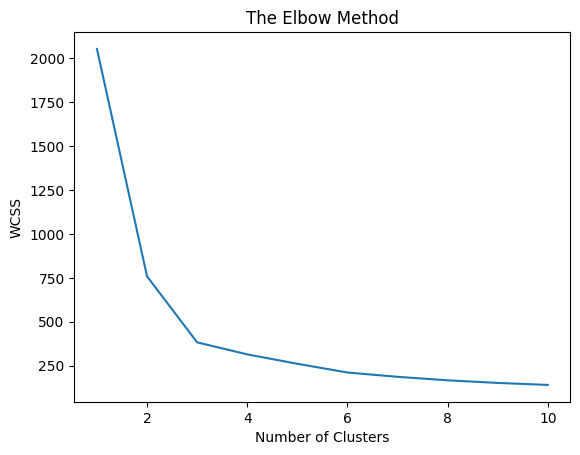

In [79]:
# we conduct the Elbow method to select the best number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 2, the average silhouette score is 0.68
For n_clusters = 3, the average silhouette score is 0.73
For n_clusters = 4, the average silhouette score is 0.69
For n_clusters = 5, the average silhouette score is 0.67
For n_clusters = 6, the average silhouette score is 0.67
For n_clusters = 7, the average silhouette score is 0.67
For n_clusters = 8, the average silhouette score is 0.63
For n_clusters = 9, the average silhouette score is 0.54
For n_clusters = 10, the average silhouette score is 0.55


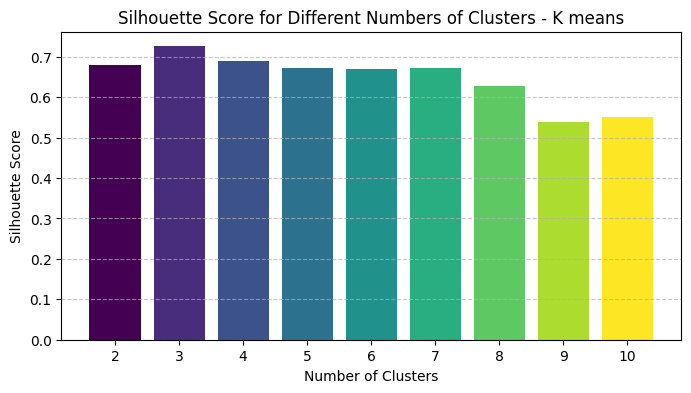

In [80]:
# Set the range of clusters you want to try
min_clusters = 2
max_clusters = 10
results = []

for n_clusters in range(min_clusters, max_clusters + 1):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    results.append((n_clusters, silhouette_avg))

# Print silhouette scores
for n_clusters, silhouette_avg in results:
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.2f}")

# Extracting number of clusters and silhouette scores
n_clusters = [result[0] for result in results]
silhouette_scores = [result[1] for result in results]

# Plotting the results
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(n_clusters, silhouette_scores, color=plt.cm.viridis(np.linspace(0, 1, len(n_clusters))))
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Score for Different Numbers of Clusters - K means')
ax.set_xticks(n_clusters)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [81]:
# we define the X

X = df_selected_features.iloc[:,0:4].values

In [82]:
# We need to create our y
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 0)

y_3= kmeans.fit_predict(X)

In [83]:
# Append the y into the dataset
df_selected_features['Class_KNN_3'] = y_3
df_selected_features

Successive_Outbidding  Winning_Ratio  Bidding_Ratio  \
Record_ID                                                        
1                            0.0       0.666667       0.400000   
2                            0.0       0.944444       0.200000   
3                            0.0       1.000000       0.200000   
4                            0.0       1.000000       0.200000   
5                            0.0       0.500000       0.222222   
...                          ...            ...            ...   
15129                        1.0       0.888889       0.160000   
15137                        0.0       0.878788       0.130435   
15138                        0.0       0.000000       0.043478   
15139                        0.0       0.000000       0.086957   
15144                        0.0       0.000000       0.043478   

           Bidder_Tendency  Class  Class_Type_Hierar_Clust  Class_KNN_3  
Record_ID                                                                
1                 0.200000      0                        0            1  
2                 0.024390      0                        0            1  
3                 0.142857      0                        0            1  
4                 0.100000      0                        0            1  
5                 0.051282      0                        0            1  
...                    ...    ...                      ...          ...  
15129             0.333333      1                        2            2  
15137             0.030612      0                        0            1  
15138             0.055556      0                        1            0  
15139             0.076923      0                        1            0  
15144             0.016393      0                        1            0  

[6321 rows x 7 columns]

In [84]:
# Investigate potential anomalies where original class is 0 but assigned to cluster 1 or 2
suspicious_bids_3 = df_selected_features[(df_selected_features['Class'] == 0) & (df_selected_features['Class_KNN_3'] == 1)]
suspicious_bids_3


Successive_Outbidding  Winning_Ratio  Bidding_Ratio  \
Record_ID                                                        
1                            0.0       0.666667       0.400000   
2                            0.0       0.944444       0.200000   
3                            0.0       1.000000       0.200000   
4                            0.0       1.000000       0.200000   
5                            0.0       0.500000       0.222222   
...                          ...            ...            ...   
15068                        0.0       0.806452       0.166667   
15071                        0.0       1.000000       0.200000   
15078                        0.0       1.000000       0.190476   
15114                        0.0       0.789474       0.120000   
15137                        0.0       0.878788       0.130435   

           Bidder_Tendency  Class  Class_Type_Hierar_Clust  Class_KNN_3  
Record_ID                                                                
1                 0.200000      0                        0            1  
2                 0.024390      0                        0            1  
3                 0.142857      0                        0            1  
4                 0.100000      0                        0            1  
5                 0.051282      0                        0            1  
...                    ...    ...                      ...          ...  
15068             0.010638      0                        0            1  
15071             0.500000      0                        0            1  
15078             0.056338      0                        0            1  
15114             0.062500      0                        0            1  
15137             0.030612      0                        0            1  

[1891 rows x 7 columns]

In [85]:
df_selected_features['Class_KNN_3'].value_counts()

Class_KNN_3
0    3637
1    1893
2     791
Name: count, dtype: int64

In [86]:
df_class_1_to_class_0_kmeans_3 = df_selected_features[(df_selected_features['Class'] == 1) & (df_selected_features['Class_KNN_3'] == 0)]
df_class_1_to_class_0_kmeans_3


Successive_Outbidding  Winning_Ratio  Bidding_Ratio  \
Record_ID                                                        
194                          0.5            0.0       0.073171   
11338                        0.5            0.0       0.095238   

           Bidder_Tendency  Class  Class_Type_Hierar_Clust  Class_KNN_3  
Record_ID                                                                
194                   0.75      1                        1            0  
11338                 1.00      1                        1            0

In [87]:
# We need to create our y
kmeans = KMeans(n_clusters = 2, init = 'k-means++',random_state = 0)

y= kmeans.fit_predict(X)

In [88]:
# Append the y into the dataset
df_selected_features['Class_KNN'] = y
df_selected_features

Successive_Outbidding  Winning_Ratio  Bidding_Ratio  \
Record_ID                                                        
1                            0.0       0.666667       0.400000   
2                            0.0       0.944444       0.200000   
3                            0.0       1.000000       0.200000   
4                            0.0       1.000000       0.200000   
5                            0.0       0.500000       0.222222   
...                          ...            ...            ...   
15129                        1.0       0.888889       0.160000   
15137                        0.0       0.878788       0.130435   
15138                        0.0       0.000000       0.043478   
15139                        0.0       0.000000       0.086957   
15144                        0.0       0.000000       0.043478   

           Bidder_Tendency  Class  Class_Type_Hierar_Clust  Class_KNN_3  \
Record_ID                                                                 
1                 0.200000      0                        0            1   
2                 0.024390      0                        0            1   
3                 0.142857      0                        0            1   
4                 0.100000      0                        0            1   
5                 0.051282      0                        0            1   
...                    ...    ...                      ...          ...   
15129             0.333333      1                        2            2   
15137             0.030612      0                        0            1   
15138             0.055556      0                        1            0   
15139             0.076923      0                        1            0   
15144             0.016393      0                        1            0   

           Class_KNN  
Record_ID             
1                  1  
2                  1  
3                  1  
4                  1  
5                  1  
...              ...  
15129              1  
15137              1  
15138              0  
15139              0  
15144              0  

[6321 rows x 8 columns]

In [89]:
# Investigate potential anomalies where original class is 0 but assigned to cluster 1 or 2
suspicious_bids = df_selected_features[(df_selected_features['Class'] == 0) & (df_selected_features['Class_KNN'] == 1)]
suspicious_bids


Successive_Outbidding  Winning_Ratio  Bidding_Ratio  \
Record_ID                                                        
1                            0.0       0.666667       0.400000   
2                            0.0       0.944444       0.200000   
3                            0.0       1.000000       0.200000   
4                            0.0       1.000000       0.200000   
5                            0.0       0.500000       0.222222   
...                          ...            ...            ...   
15071                        0.0       1.000000       0.200000   
15078                        0.0       1.000000       0.190476   
15114                        0.0       0.789474       0.120000   
15124                        0.5       0.500000       0.200000   
15137                        0.0       0.878788       0.130435   

           Bidder_Tendency  Class  Class_Type_Hierar_Clust  Class_KNN_3  \
Record_ID                                                                 
1                 0.200000      0                        0            1   
2                 0.024390      0                        0            1   
3                 0.142857      0                        0            1   
4                 0.100000      0                        0            1   
5                 0.051282      0                        0            1   
...                    ...    ...                      ...          ...   
15071             0.500000      0                        0            1   
15078             0.056338      0                        0            1   
15114             0.062500      0                        0            1   
15124             0.625000      0                        1            2   
15137             0.030612      0                        0            1   

           Class_KNN  
Record_ID             
1                  1  
2                  1  
3                  1  
4                  1  
5                  1  
...              ...  
15071              1  
15078              1  
15114              1  
15124              1  
15137              1  

[1998 rows x 8 columns]

In [90]:
df_selected_features['Class_KNN'].value_counts()

Class_KNN
0    3652
1    2669
Name: count, dtype: int64

In [91]:
df_class_1_to_class_0_kmeans = df_selected_features[(df_selected_features['Class'] == 1) & (df_selected_features['Class_KNN'] == 0)]
df_class_1_to_class_0_kmeans


Successive_Outbidding  Winning_Ratio  Bidding_Ratio  \
Record_ID                                                        
194                          0.5            0.0       0.073171   
1942                         1.0            0.0       0.070175   
3108                         1.0            0.0       0.785714   
11338                        0.5            0.0       0.095238   

           Bidder_Tendency  Class  Class_Type_Hierar_Clust  Class_KNN_3  \
Record_ID                                                                 
194               0.750000      1                        1            0   
1942              1.000000      1                        1            2   
3108              0.733333      1                        2            2   
11338             1.000000      1                        1            0   

           Class_KNN  
Record_ID             
194                0  
1942               0  
3108               0  
11338              0

In [92]:
df_selected_features

Successive_Outbidding  Winning_Ratio  Bidding_Ratio  \
Record_ID                                                        
1                            0.0       0.666667       0.400000   
2                            0.0       0.944444       0.200000   
3                            0.0       1.000000       0.200000   
4                            0.0       1.000000       0.200000   
5                            0.0       0.500000       0.222222   
...                          ...            ...            ...   
15129                        1.0       0.888889       0.160000   
15137                        0.0       0.878788       0.130435   
15138                        0.0       0.000000       0.043478   
15139                        0.0       0.000000       0.086957   
15144                        0.0       0.000000       0.043478   

           Bidder_Tendency  Class  Class_Type_Hierar_Clust  Class_KNN_3  \
Record_ID                                                                 
1                 0.200000      0                        0            1   
2                 0.024390      0                        0            1   
3                 0.142857      0                        0            1   
4                 0.100000      0                        0            1   
5                 0.051282      0                        0            1   
...                    ...    ...                      ...          ...   
15129             0.333333      1                        2            2   
15137             0.030612      0                        0            1   
15138             0.055556      0                        1            0   
15139             0.076923      0                        1            0   
15144             0.016393      0                        1            0   

           Class_KNN  
Record_ID             
1                  1  
2                  1  
3                  1  
4                  1  
5                  1  
...              ...  
15129              1  
15137              1  
15138              0  
15139              0  
15144              0  

[6321 rows x 8 columns]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


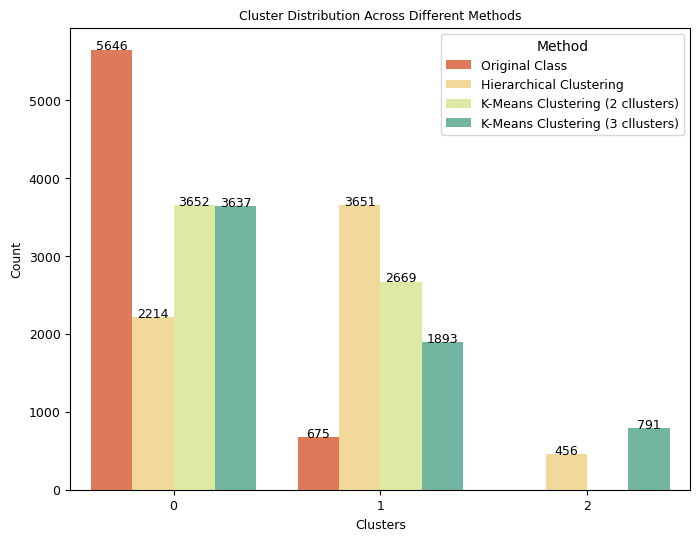

In [93]:
# Value counts for each clustering method and the original class
original_class_counts = df_selected_features['Class'].value_counts().sort_index()
hierar_clust_counts = df_selected_features['Class_Type_Hierar_Clust'].value_counts().sort_index()
knn_counts = df_selected_features['Class_KNN'].value_counts().sort_index()
knn_3_counts = df_selected_features['Class_KNN_3'].value_counts().sort_index()

# Combine the counts into a single DataFrame
counts_df = pd.DataFrame({
    'Original Class': original_class_counts,
    'Hierarchical Clustering': hierar_clust_counts,
    'K-Means Clustering (2 cllusters)': knn_counts,
    'K-Means Clustering (3 cllusters)': knn_3_counts
})

# Reset index to use it as a column for plotting
counts_df = counts_df.reset_index().rename(columns={'index': 'Cluster'})

# Melt the DataFrame for easier plotting
counts_melted = pd.melt(counts_df, id_vars='Cluster', var_name='Method', value_name='Count')

# Plotting the combined bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Cluster', y='Count', hue='Method', data=counts_melted, palette='Spectral')

# Add the value counts on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., 
        height + 1, 
        '{:1.0f}'.format(height), 
        ha="center"
        , fontsize = 9
    )

plt.title('Cluster Distribution Across Different Methods', fontsize = 9)
plt.xlabel('Clusters', fontsize = 9)
plt.xticks(fontsize = 9)
plt.ylabel('Count', fontsize = 9)
plt.yticks(fontsize = 9)
plt.legend(title='Method', loc='upper right', fontsize = 9)
plt.show()

In [94]:
counts_df

Cluster  Original Class  Hierarchical Clustering  \
0        0          5646.0                     2214   
1        1           675.0                     3651   
2        2             NaN                      456   

   K-Means Clustering (2 cllusters)  K-Means Clustering (3 cllusters)  
0                            3652.0                              3637  
1                            2669.0                              1893  
2                               NaN                               791

In [95]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Extract features for evaluation
# we define the X
X = df_selected_features.iloc[:,0:4].values

# Initialize results dictionary
results = {}

# Original Class Labels (if you want to compare against true labels)
y_true = df_selected_features['Class']

# Evaluate Agglomerative Clustering
agglo_labels = df_selected_features['Class_Type_Hierar_Clust']
results['Agglomerative Clustering'] = {
    'Silhouette Score': silhouette_score(X, agglo_labels),
    'Davies-Bouldin Index': davies_bouldin_score(X, agglo_labels),
    'Calinski-Harabasz Index': calinski_harabasz_score(X, agglo_labels)
}

# Evaluate KMeans with 2 clusters
kmeans_2_labels = df_selected_features['Class_KNN']
results['KMeans (2 Clusters)'] = {
    'Silhouette Score': silhouette_score(X, kmeans_2_labels),
    'Davies-Bouldin Index': davies_bouldin_score(X, kmeans_2_labels),
    'Calinski-Harabasz Index': calinski_harabasz_score(X, kmeans_2_labels)
}

# Evaluate KMeans with 3 clusters
kmeans_3_labels = df_selected_features['Class_KNN_3']
results['KMeans (3 Clusters)'] = {
    'Silhouette Score': silhouette_score(X, kmeans_3_labels),
    'Davies-Bouldin Index': davies_bouldin_score(X, kmeans_3_labels),
    'Calinski-Harabasz Index': calinski_harabasz_score(X, kmeans_3_labels)
}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Print the results
results_df


Silhouette Score  Davies-Bouldin Index  \
Agglomerative Clustering          0.716558              0.549732   
KMeans (2 Clusters)               0.679463              0.595766   
KMeans (3 Clusters)               0.725310              0.639157   

                          Calinski-Harabasz Index  
Agglomerative Clustering             12523.189371  
KMeans (2 Clusters)                  10792.319333  
KMeans (3 Clusters)                  13793.734113

In [96]:
# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Method'})
results_df

Method  Silhouette Score  Davies-Bouldin Index  \
0  Agglomerative Clustering          0.716558              0.549732   
1       KMeans (2 Clusters)          0.679463              0.595766   
2       KMeans (3 Clusters)          0.725310              0.639157   

   Calinski-Harabasz Index  
0             12523.189371  
1             10792.319333  
2             13793.734113

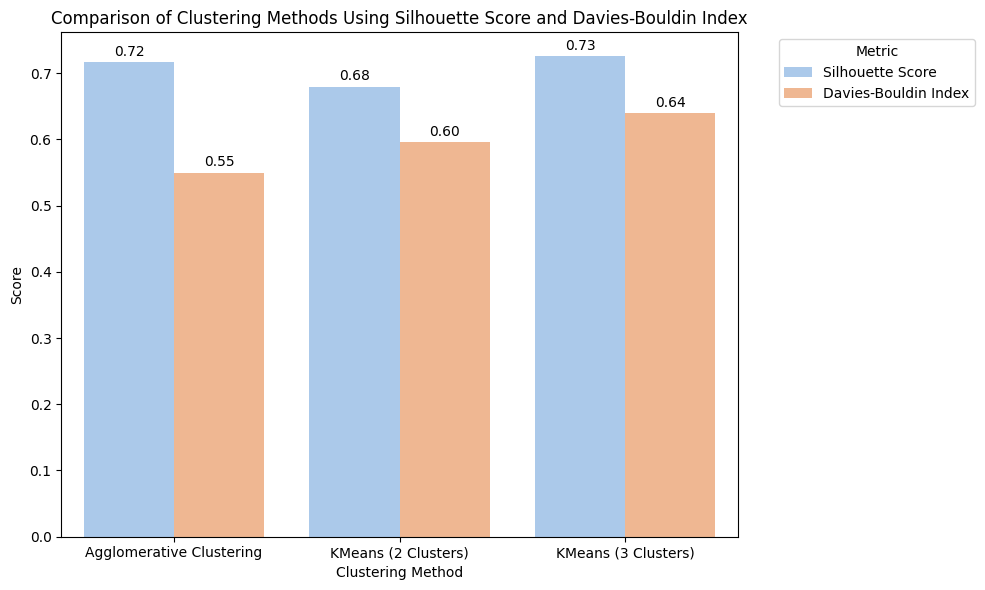

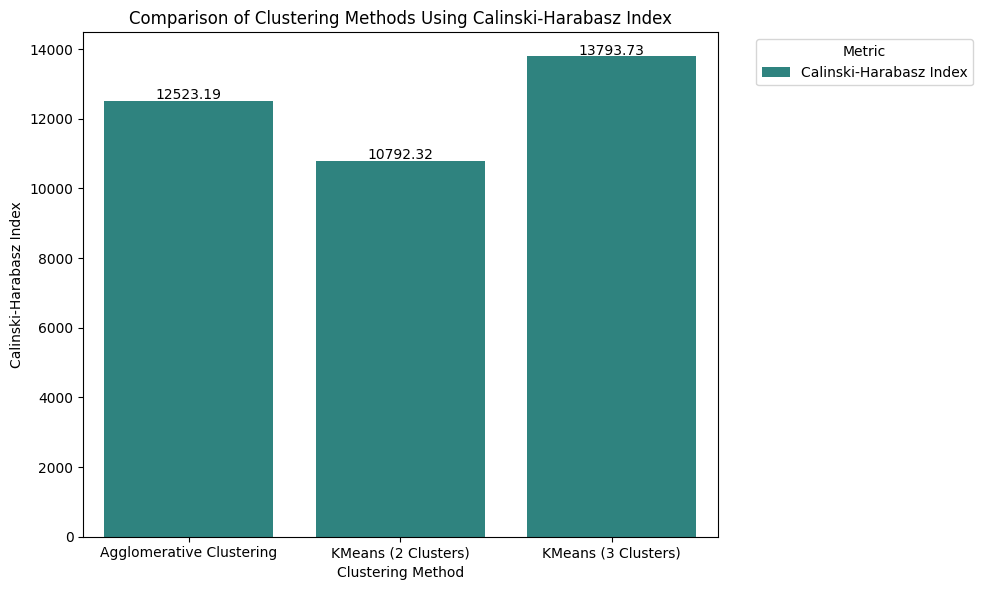

In [97]:
# Melt the DataFrame for easier plotting with seaborn
results_melted = results_df.melt(id_vars='Method', var_name='Metric', value_name='Score')

# Split the DataFrame into two based on the metric
metrics1 = results_melted[results_melted['Metric'].isin(['Silhouette Score', 'Davies-Bouldin Index'])]
metrics2 = results_melted[results_melted['Metric'] == 'Calinski-Harabasz Index']

# Plotting the Silhouette Score and Davies-Bouldin Index
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='Method', y='Score', hue='Metric', data=metrics1, palette='pastel')

# Add value labels on top of the bars
for p in ax1.patches:
    height = p.get_height()
    ax1.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.01,  # Adjust the offset for better visibility
        f'{height:.2f}',
        ha="center"
    )

plt.title('Comparison of Clustering Methods Using Silhouette Score and Davies-Bouldin Index')
plt.xlabel('Clustering Method')
plt.ylabel('Score')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting the Calinski-Harabasz Index separately
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='Method', y='Score', hue='Metric', data=metrics2, palette='viridis')

# Add value labels on top of the bars
for p in ax2.patches:
    height = p.get_height()
    ax2.text(
        p.get_x() + p.get_width() / 2.,
        height + 50,  # Adjust the offset for better visibility
        f'{height:.2f}',
        ha="center"
    )

plt.title('Comparison of Clustering Methods Using Calinski-Harabasz Index')
plt.xlabel('Clustering Method')
plt.ylabel('Calinski-Harabasz Index')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [98]:
df_selected_features

Successive_Outbidding  Winning_Ratio  Bidding_Ratio  \
Record_ID                                                        
1                            0.0       0.666667       0.400000   
2                            0.0       0.944444       0.200000   
3                            0.0       1.000000       0.200000   
4                            0.0       1.000000       0.200000   
5                            0.0       0.500000       0.222222   
...                          ...            ...            ...   
15129                        1.0       0.888889       0.160000   
15137                        0.0       0.878788       0.130435   
15138                        0.0       0.000000       0.043478   
15139                        0.0       0.000000       0.086957   
15144                        0.0       0.000000       0.043478   

           Bidder_Tendency  Class  Class_Type_Hierar_Clust  Class_KNN_3  \
Record_ID                                                                 
1                 0.200000      0                        0            1   
2                 0.024390      0                        0            1   
3                 0.142857      0                        0            1   
4                 0.100000      0                        0            1   
5                 0.051282      0                        0            1   
...                    ...    ...                      ...          ...   
15129             0.333333      1                        2            2   
15137             0.030612      0                        0            1   
15138             0.055556      0                        1            0   
15139             0.076923      0                        1            0   
15144             0.016393      0                        1            0   

           Class_KNN  
Record_ID             
1                  1  
2                  1  
3                  1  
4                  1  
5                  1  
...              ...  
15129              1  
15137              1  
15138              0  
15139              0  
15144              0  

[6321 rows x 8 columns]

In [99]:
df_updated = df_selected_features.drop(['Class_Type_Hierar_Clust','Class_KNN'], axis=1).rename(columns={'Class_KNN_3': 'Updated_Class'}).copy()
df_updated


Successive_Outbidding  Winning_Ratio  Bidding_Ratio  \
Record_ID                                                        
1                            0.0       0.666667       0.400000   
2                            0.0       0.944444       0.200000   
3                            0.0       1.000000       0.200000   
4                            0.0       1.000000       0.200000   
5                            0.0       0.500000       0.222222   
...                          ...            ...            ...   
15129                        1.0       0.888889       0.160000   
15137                        0.0       0.878788       0.130435   
15138                        0.0       0.000000       0.043478   
15139                        0.0       0.000000       0.086957   
15144                        0.0       0.000000       0.043478   

           Bidder_Tendency  Class  Updated_Class  
Record_ID                                         
1                 0.200000      0              1  
2                 0.024390      0              1  
3                 0.142857      0              1  
4                 0.100000      0              1  
5                 0.051282      0              1  
...                    ...    ...            ...  
15129             0.333333      1              2  
15137             0.030612      0              1  
15138             0.055556      0              0  
15139             0.076923      0              0  
15144             0.016393      0              0  

[6321 rows x 6 columns]

In [100]:

# Updating class of records 194 and 11338

# Display current state of records 194 and 11338
print("Before update:")
print(df_updated.loc[[194, 11338], ['Class', 'Updated_Class']])

# Update the 'Updated_Class' column for records 194 and 11338
df_updated.loc[194, 'Updated_Class'] = 1
df_updated.loc[11338, 'Updated_Class'] = 1

# Verify the update
print("\nAfter update:")
print(df_updated.loc[[194, 11338], ['Class', 'Updated_Class']])


Before update:
           Class  Updated_Class
Record_ID                      
194            1              0
11338          1              0

After update:
           Class  Updated_Class
Record_ID                      
194            1              1
11338          1              1


In [101]:
df_updated['Updated_Class'] = df_updated['Updated_Class'].replace(2, 1)
df_updated['Updated_Class'].value_counts()

Updated_Class
0    3635
1    2686
Name: count, dtype: int64

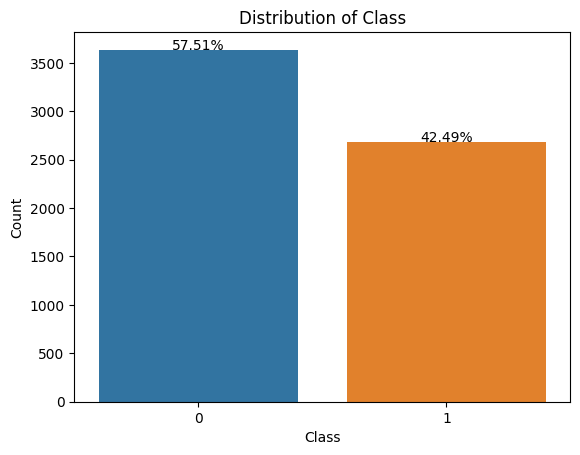

Class
0    5646
1     675
Name: count, dtype: int64
New % of Class 1: 42.49327638031957


In [102]:

sns.countplot(data=df_updated, x='Updated_Class')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')

# Calculate the total number of instances in the dataset
total = len(df_updated['Updated_Class'])

# Annotate the bars with the percentage of each class
for p in plt.gca().patches:
    height = p.get_height()  # Get the height of each bar
    # Calculate the percentage of each class based on the height
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height/total)*100), ha='center')

plt.show()


print(df_updated.Class.value_counts())

# Calculate the percentage of Class 1 instances
percentage_class_1 = (df_updated[df_updated['Updated_Class'] == 1]['Updated_Class'].count() / df_updated['Updated_Class'].count()) * 100

print("New % of Class 1:", percentage_class_1)



In [103]:
# we define the X
X = df_updated.iloc[:,0:4].values
y = df.iloc[:,-1].values

In [104]:
X

array([[0.        , 0.66666667, 0.4       , 0.2       ],
       [0.        , 0.94444444, 0.2       , 0.02439024],
       [0.        , 1.        , 0.2       , 0.14285714],
       ...,
       [0.        , 0.        , 0.04347826, 0.05555556],
       [0.        , 0.        , 0.08695652, 0.07692308],
       [0.        , 0.        , 0.04347826, 0.01639344]])

In [105]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [106]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [107]:
# Instantiate the SVM classifier
classifier = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=0)
classifier.fit(X_train, y_train)


SVC(random_state=0)

In [108]:
# compare and test results of y

y_pred = classifier.predict(X_test)

In [109]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[1392,   30],
       [   1,  158]])

In [110]:
classifier.score(X_test, y_test)

0.9803921568627451

In [111]:
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9827
Test Accuracy: 0.9804


In [112]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(classifier, X, y, cv=5)
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cross_val_scores):.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {np.std(cross_val_scores):.4f}")

Cross-Validation Scores: [0.98181818 0.98259494 0.98417722 0.9818038  0.97863924]
Mean Cross-Validation Score: 0.9818
Standard Deviation of Cross-Validation Scores: 0.0018


In [113]:
X = df_selected_features[['Successive_Outbidding', 'Winning_Ratio', 'Bidding_Ratio', 'Bidder_Tendency']].values
y = df['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the classifier
classifier = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=0)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

def random_classifier_predictions(classifier, num_samples=10):
    results = []
    for _ in range(num_samples):
        # Generate random inputs scaled from 0 to 1
        successive_outbidding = random.random()
        winning_ratio = random.random()
        bidding_ratio = random.random()
        bidder_tendency = random.random()
        #last_bidding = random.random()

        # Predict using the generated random values
        predicted_class = classifier.predict([[successive_outbidding, winning_ratio, bidding_ratio, bidder_tendency]])[0]
        results.append((successive_outbidding, winning_ratio, bidding_ratio, bidder_tendency, predicted_class))

    return results

# Generate and print random predictions
random_results = random_classifier_predictions(classifier)
for res in random_results:
    print(f"Successive Outbidding: {res[0]:.2f}, Winning Ratio: {res[1]:.2f}, Bidding Ratio: {res[2]:.2f}, Bidder Tendency: {res[3]:.2f} => Predicted Class: {res[4]}")
print('\n\n')    

# Create a DataFrame from the random predictions
random_df = pd.DataFrame(random_results, columns=[
    'Successive Outbidding', 'Winning Ratio', 'Bidding Ratio', 'Bidder Tendency', 'Predicted Class'
])

# Print the DataFrame
random_df


Successive Outbidding: 0.22, Winning Ratio: 0.27, Bidding Ratio: 0.16, Bidder Tendency: 0.81 => Predicted Class: 0
Successive Outbidding: 0.83, Winning Ratio: 0.08, Bidding Ratio: 0.78, Bidder Tendency: 0.80 => Predicted Class: 1
Successive Outbidding: 0.48, Winning Ratio: 0.32, Bidding Ratio: 0.91, Bidder Tendency: 0.73 => Predicted Class: 1
Successive Outbidding: 0.83, Winning Ratio: 0.38, Bidding Ratio: 0.60, Bidder Tendency: 0.94 => Predicted Class: 1
Successive Outbidding: 0.76, Winning Ratio: 0.27, Bidding Ratio: 0.95, Bidder Tendency: 0.81 => Predicted Class: 1
Successive Outbidding: 0.60, Winning Ratio: 0.88, Bidding Ratio: 0.68, Bidder Tendency: 0.94 => Predicted Class: 1
Successive Outbidding: 0.85, Winning Ratio: 0.91, Bidding Ratio: 0.19, Bidder Tendency: 0.86 => Predicted Class: 1
Successive Outbidding: 0.33, Winning Ratio: 0.56, Bidding Ratio: 0.50, Bidder Tendency: 0.31 => Predicted Class: 1
Successive Outbidding: 0.69, Winning Ratio: 0.83, Bidding Ratio: 0.45, Bidder Te

Successive Outbidding  Winning Ratio  Bidding Ratio  Bidder Tendency  \
0               0.222772       0.273203       0.157239         0.805461   
1               0.833108       0.077159       0.784921         0.797983   
2               0.477103       0.315600       0.912991         0.734678   
3               0.826722       0.383696       0.597028         0.942285   
4               0.760368       0.266621       0.946756         0.812283   
5               0.597966       0.878983       0.675270         0.943686   
6               0.854630       0.907324       0.188254         0.857043   
7               0.333445       0.560356       0.496205         0.312167   
8               0.689327       0.833739       0.446338         0.342535   
9               0.100614       0.102413       0.810302         0.180749   

   Predicted Class  
0                0  
1                1  
2                1  
3                1  
4                1  
5                1  
6                1  
7                1  
8                1  
9                0

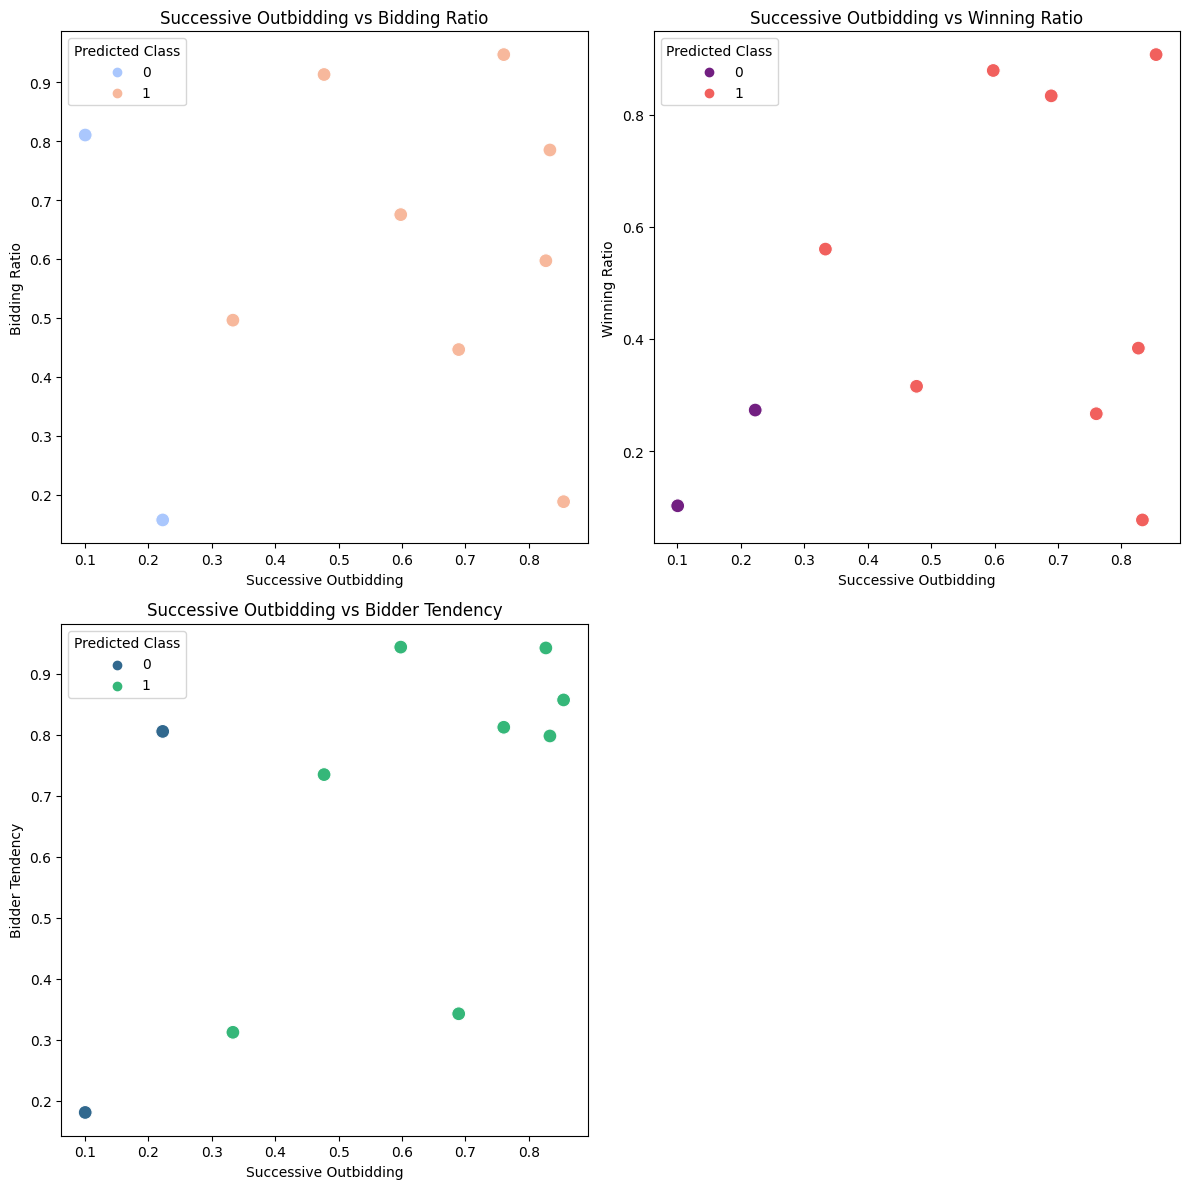

In [114]:
# Create subplots with a 2 + 1 layout
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot each scatter plot in a different subplot
sns.scatterplot(ax=axes[0, 0], data=random_df, x='Successive Outbidding', y='Bidding Ratio', hue='Predicted Class', palette='coolwarm', s=100)
axes[0, 0].set_title('Successive Outbidding vs Bidding Ratio')
axes[0, 0].set_xlabel('Successive Outbidding')
axes[0, 0].set_ylabel('Bidding Ratio')
axes[0, 0].legend(title='Predicted Class')

sns.scatterplot(ax=axes[0, 1], data=random_df, x='Successive Outbidding', y='Winning Ratio', hue='Predicted Class', palette='magma', s=100)
axes[0, 1].set_title('Successive Outbidding vs Winning Ratio')
axes[0, 1].set_xlabel('Successive Outbidding')
axes[0, 1].set_ylabel('Winning Ratio')
axes[0, 1].legend(title='Predicted Class')

sns.scatterplot(ax=axes[1, 0], data=random_df, x='Successive Outbidding', y='Bidder Tendency', hue='Predicted Class', palette='viridis', s=100)
axes[1, 0].set_title('Successive Outbidding vs Bidder Tendency')
axes[1, 0].set_xlabel('Successive Outbidding')
axes[1, 0].set_ylabel('Bidder Tendency')
axes[1, 0].legend(title='Predicted Class')

# Remove the empty subplot (axes[1, 1])
fig.delaxes(axes[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


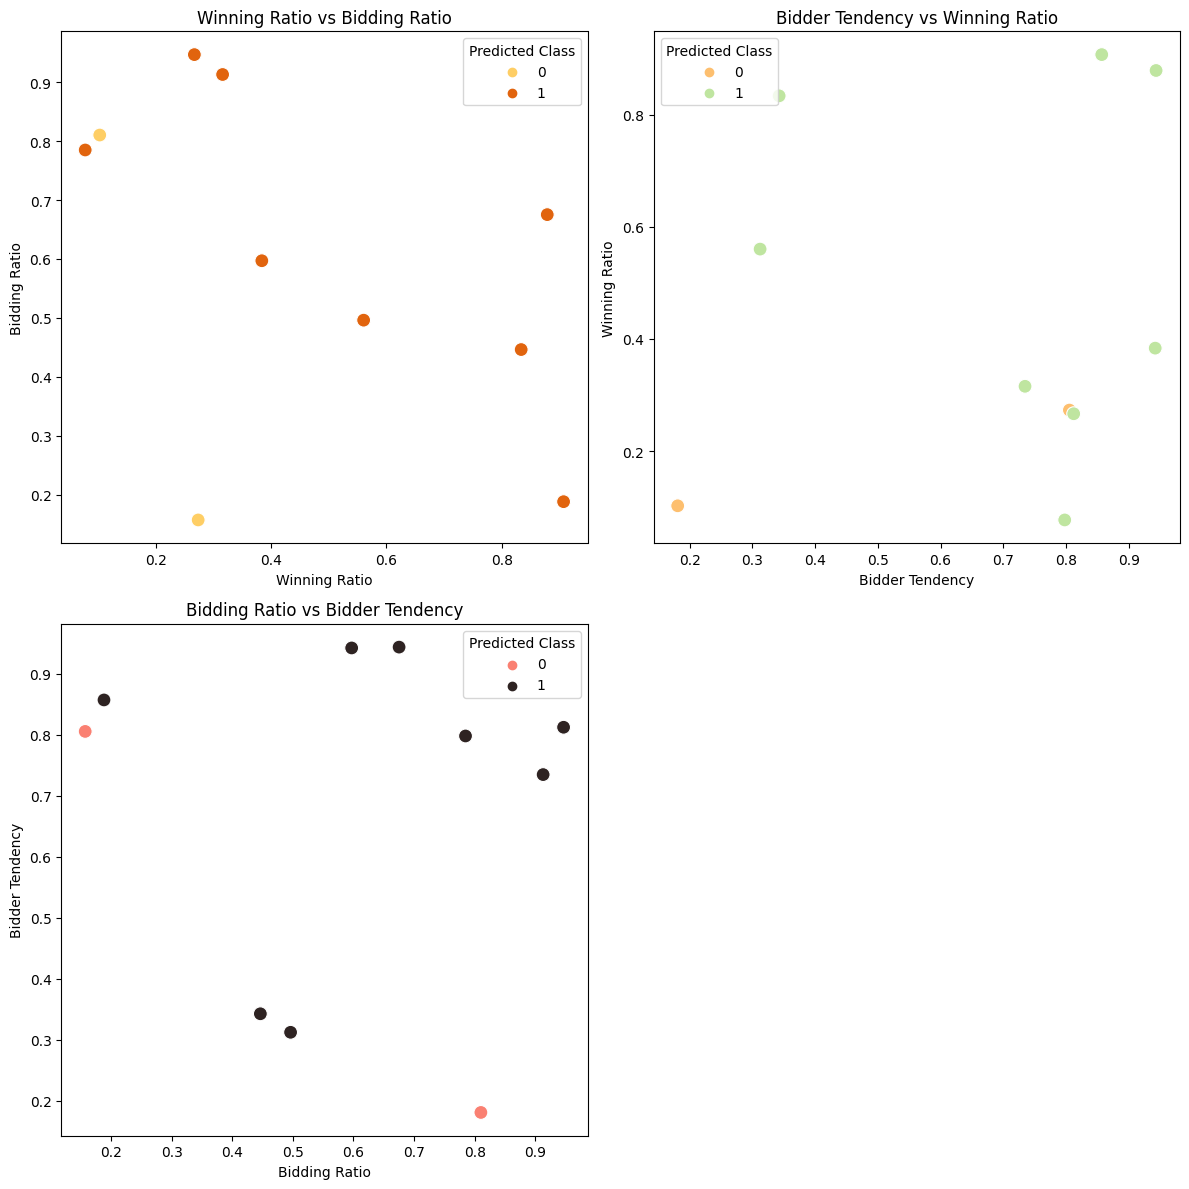

In [115]:
# Create subplots with a 2 + 1 layout
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot each scatter plot in a different subplot
sns.scatterplot(ax=axes[0, 0], data=random_df, x='Winning Ratio', y='Bidding Ratio', hue='Predicted Class', palette='YlOrBr', s=100)
axes[0, 0].set_title('Winning Ratio vs Bidding Ratio')
axes[0, 0].set_xlabel('Winning Ratio')
axes[0, 0].set_ylabel('Bidding Ratio')
axes[0, 0].legend(title='Predicted Class')

sns.scatterplot(ax=axes[0, 1], data=random_df, x='Bidder Tendency', y='Winning Ratio', hue='Predicted Class', palette='Spectral', s=100)
axes[0, 1].set_title('Bidder Tendency vs Winning Ratio')
axes[0, 1].set_xlabel('Bidder Tendency')
axes[0, 1].set_ylabel('Winning Ratio')
axes[0, 1].legend(title='Predicted Class')

sns.scatterplot(ax=axes[1, 0], data=random_df, x='Bidding Ratio', y='Bidder Tendency', hue='Predicted Class', palette='dark:salmon_r', s=100)
axes[1, 0].set_title('Bidding Ratio vs Bidder Tendency')
axes[1, 0].set_xlabel('Bidding Ratio')
axes[1, 0].set_ylabel('Bidder Tendency')
axes[1, 0].legend(title='Predicted Class')

# Remove the empty subplot (axes[1, 1])
fig.delaxes(axes[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()

# 4- Regression

In [116]:
# import dataset

df_auction = pd.read_csv('eBay_Auction_Data.csv')
df_auction.head()

Starting_Price  Number_of_Bidders  Auction_Duration_Days  Bidder_Activity  \
0           55.33                 18                      2            2.450   
1           71.80                  7                     11            0.827   
2           60.67                 11                      9            3.244   
3           54.94                  6                     14            2.058   
4           42.94                  5                     11            2.057   

   Final_Price  
0        60.73  
1        94.44  
2        87.54  
3        67.31  
4        59.19

In [117]:
df_auction.isnull().sum()

Starting_Price           0
Number_of_Bidders        0
Auction_Duration_Days    0
Bidder_Activity          0
Final_Price              0
dtype: int64

In [118]:
df_auction.isna().sum()

Starting_Price           0
Number_of_Bidders        0
Auction_Duration_Days    0
Bidder_Activity          0
Final_Price              0
dtype: int64

In [119]:
df_auction.describe().T

count      mean        std    min       25%     50%  \
Starting_Price         1000.0  50.09617  28.783819  1.050  25.51250  48.655   
Number_of_Bidders      1000.0  10.47600   5.304485  1.000   6.00000  11.000   
Auction_Duration_Days  1000.0   7.54000   4.040139  1.000   4.00000   8.000   
Bidder_Activity        1000.0   2.88638   2.285458  0.027   1.05375   2.347   
Final_Price            1000.0  67.26669  31.703775 -4.320  41.92750  65.550   

                           75%      max  
Starting_Price         73.9900   99.980  
Number_of_Bidders      15.0000   19.000  
Auction_Duration_Days  11.0000   14.000  
Bidder_Activity         4.1835   13.333  
Final_Price            92.4000  155.450

In [120]:
from scipy import stats

# Select only numerical columns
numerical_columns = df_auction.select_dtypes(include='number').columns

# Loop through numerical columns
for column1 in numerical_columns:
    if column1 != 'Final_Price':
        pearson_coef, p_value = stats.pearsonr(df_auction[column1], df_auction['Final_Price'])
        # Interpretation of the results
        print(f'Analysis between {column1} and Final_Price:')
        print(f'Pearson correlation coefficient: {pearson_coef}')
        print(f'P-value: {p_value}')
        
        if abs(pearson_coef) >= 0.7:
            print('Correlation Coefficient: Large relationship')
        elif 0.3 <= abs(pearson_coef) < 0.7:
            print('Correlation Coefficient: Moderate relationship')
        else:
            print('Correlation Coefficient: No significant relationship')
        
        if p_value < 0.001:
            print('P-value: Strong certainty in the result')
        elif p_value < 0.05:
            print('P-value: Moderate certainty in the result')
        elif p_value < 0.1:
            print('P-value: Weak certainty in the result')
        else:
            print('P-value: No certainty in the result')
        
        print('\n')

Analysis between Starting_Price and Final_Price:
Pearson correlation coefficient: 0.9120246729547061
P-value: 0.0
Correlation Coefficient: Large relationship
P-value: Strong certainty in the result


Analysis between Number_of_Bidders and Final_Price:
Pearson correlation coefficient: 0.09036268783522745
P-value: 0.004239116693672639
Correlation Coefficient: No significant relationship
P-value: Moderate certainty in the result


Analysis between Auction_Duration_Days and Final_Price:
Pearson correlation coefficient: 0.23057429549882663
P-value: 1.5596523652429495e-13
Correlation Coefficient: No significant relationship
P-value: Strong certainty in the result


Analysis between Bidder_Activity and Final_Price:
Pearson correlation coefficient: 0.15957230366533998
P-value: 3.9294614109127353e-07
Correlation Coefficient: No significant relationship
P-value: Strong certainty in the result




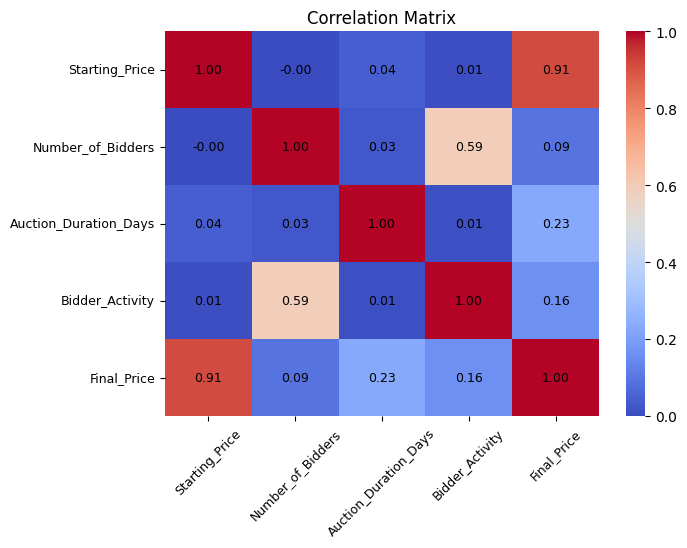

In [121]:
# Compute the correlation matrix
correlation_matrix = df_auction.corr()

# Plot heatmap with annotations using a for loop
plt.figure(figsize=(7, 5))
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j+0.5, i+0.5, '{:.2f}'.format(correlation_matrix.iloc[i, j]), ha='center', va='center', fontsize=9)

sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.xticks(rotation=45, fontsize = 9)
plt.yticks(fontsize=9)
plt.show()

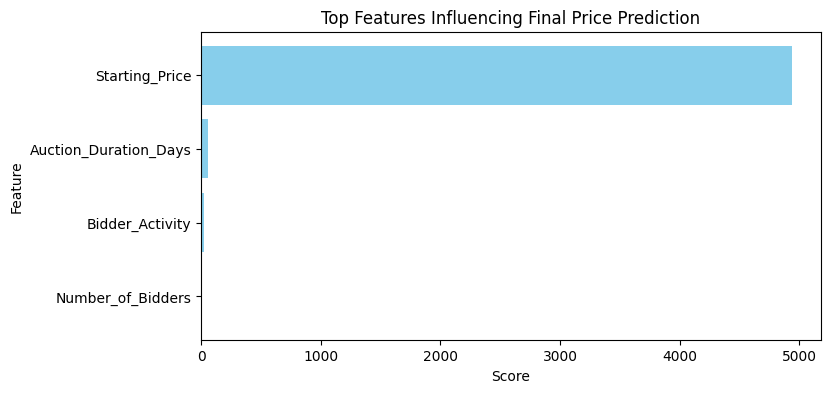

In [122]:
from sklearn.feature_selection import f_regression

# Initialize SelectKBest
kbest = SelectKBest(score_func=f_regression, k='all') 

# Split your data into features (X) and target variable (y)
X = df_auction.drop(['Final_Price'], axis=1)  
y = df_auction['Final_Price']

# Fit SelectKBest on your features and target variable
kbest.fit(X, y)

# Get the scores of each feature
scores = kbest.scores_

# Sort the features based on their scores
sorted_indices = np.argsort(scores)[::-1]  # Sort in descending order

# Plot the top k features with their scores
top_k = 5
top_features = X.columns[sorted_indices[:top_k]]
top_scores = scores[sorted_indices[:top_k]]

plt.figure(figsize=(8,4))
plt.barh(top_features, top_scores, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Top Features Influencing Final Price Prediction')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.show()

In [123]:
X = df_auction.drop(columns=['Number_of_Bidders']).values
y = df_auction['Final_Price'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the regression models
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

# Training and evaluating the models
results = {}
for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R-squared': r2}

# Print the results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Mean Squared Error (MSE) = {metrics['MSE']:.2f}")
    print(f"  R-squared = {metrics['R-squared']:.2f}")

Linear Regression:
  Mean Squared Error (MSE) = 0.00
  R-squared = 1.00
Decision Tree Regressor:
  Mean Squared Error (MSE) = 0.10
  R-squared = 1.00
Random Forest Regressor:
  Mean Squared Error (MSE) = 0.03
  R-squared = 1.00
Support Vector Regressor:
  Mean Squared Error (MSE) = 8.69
  R-squared = 0.99
K-Nearest Neighbors Regressor:
  Mean Squared Error (MSE) = 2.29
  R-squared = 1.00


In [124]:
X = df_auction.drop(columns=['Final_Price'])  # Features
y = df_auction['Final_Price']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the regression models
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

# Training and evaluating the models
results = {}
for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R-squared': r2}

# Print the results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Mean Squared Error (MSE) = {metrics['MSE']:.2f}")
    print(f"  R-squared = {metrics['R-squared']:.2f}")

Linear Regression:
  Mean Squared Error (MSE) = 98.46
  R-squared = 0.90
Decision Tree Regressor:
  Mean Squared Error (MSE) = 232.45
  R-squared = 0.77
Random Forest Regressor:
  Mean Squared Error (MSE) = 121.41
  R-squared = 0.88
Support Vector Regressor:
  Mean Squared Error (MSE) = 156.51
  R-squared = 0.84
K-Nearest Neighbors Regressor:
  Mean Squared Error (MSE) = 147.20
  R-squared = 0.85


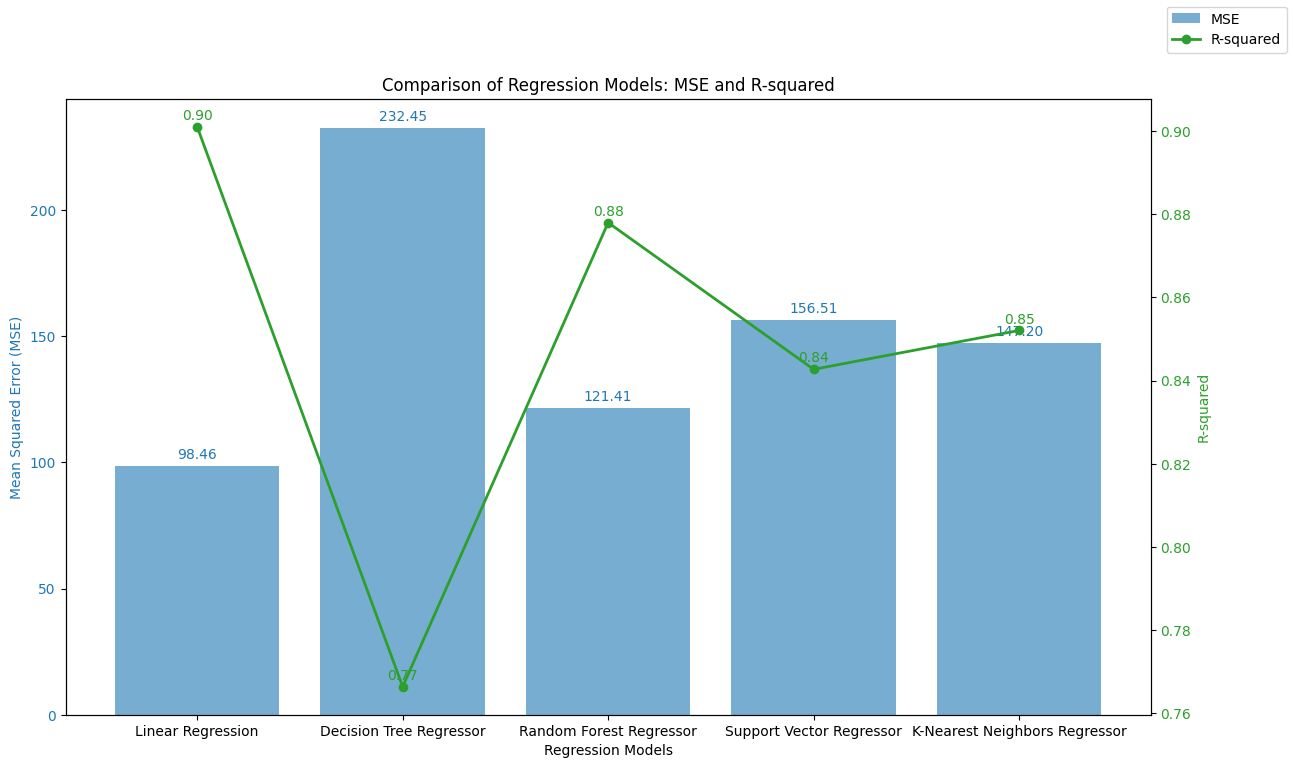

<Figure size 800x400 with 0 Axes>

In [125]:
# Create DataFrame from the results
results_df = pd.DataFrame(results).T

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for MSE
ax1.set_title('Comparison of Regression Models: MSE and R-squared')
ax1.set_xlabel('Regression Models')
ax1.set_ylabel('Mean Squared Error (MSE)', color='tab:blue')
bars = ax1.bar(results_df.index, results_df['MSE'], color='tab:blue', alpha=0.6, label='MSE')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Add MSE values on top of the bars
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', color='tab:blue')

# Create a second y-axis for R-squared
ax2 = ax1.twinx()
ax2.set_ylabel('R-squared', color='tab:green')
ax2.plot(results_df.index, results_df['R-squared'], color='tab:green', marker='o', linestyle='-', linewidth=2, label='R-squared')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Add R-squared values along the line
for i, r2 in enumerate(results_df['R-squared']):
    ax2.annotate(f'{r2:.2f}', xy=(i, r2), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', color='tab:green')

# Combine legends
fig.legend(loc="upper right")
plt.figure(figsize=(8,4))
plt.show()


### Linear Regression Model

In [126]:
# We select which ones will be my X and which one will be my y variable
X = df_auction.drop(columns=['Final_Price'])  # Features
y = df_auction['Final_Price']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
#What is the accuracy of this model if I try to make predictions? --> r^2
print("R-squared (R2) Training Set:",regressor.score(X_train, y_train))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R-squared (R2)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Test Set:", r_squared)

R-squared (R2) Training Set: 0.8966189086269739
Mean Absolute Error (MAE): 8.31909486765835
Mean Squared Error (MSE): 115.6864697534412
Root Mean Squared Error (RMSE): 10.75576448949312
R-squared (R2) Test Set: 0.8778432172387699


#### Cross-Validation LR

In [127]:
# Standardize the features
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

# Initialize the linear regression model
regressor_lr = LinearRegression()

# Perform cross-validation with 10 folds
scores_lr = cross_val_score(regressor_lr, X_scaled, y, scoring='neg_mean_squared_error', cv=10)

# Calculate the RMSE for each fold
rmse_scores_lr = np.sqrt(-scores_lr)

# Print/display the results
print("Linear Regression RMSE scores:", rmse_scores_lr)
print("Mean RMSE:", rmse_scores_lr.mean())
print("Standard Deviation of RMSE:", rmse_scores_lr.std())

Linear Regression RMSE scores: [10.33216098 11.34881858  9.98596737 10.65393657 10.55007213 10.49001702
 10.62600488 10.04743315 10.54720001  9.44413395]
Mean RMSE: 10.402574463040432
Standard Deviation of RMSE: 0.47770842505268907


In [128]:
#What is the accuracy of this model if I try to make predictions? --> r^2

regressor.score(X_train, y_train)

0.8966189086269739

### RandomForest Regression Model

In [129]:
# We select which ones will be my X and which one will be my y variable
X = df_auction.drop(columns=['Final_Price'])  # Features
y = df_auction['Final_Price']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# n_estimators is the number of trees you want to use for the model usually between 10 and 15.
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

#We predict the test results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2) # optional, this is to have decimal after the comma
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Evaluate the model
#What is the accuracy of this model if I try to make predictions? --> r^2
print("R-squared (R2) Training Set:",regressor.score(X_train, y_train))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R-squared (R2)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Test Set:", r_squared)

R-squared (R2) Training Set: 0.9763562501941095
Mean Absolute Error (MAE): 9.66303
Mean Squared Error (MSE): 147.08792471000004
Root Mean Squared Error (RMSE): 12.127981064876382
R-squared (R2) Test Set: 0.8446854873876453


#### Cross-Validation RF

In [130]:
# Standardize the features
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

# Initialize the random forest regressor
regressor_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation with 10 folds
scores_rf = cross_val_score(regressor_rf, X_scaled, y, scoring='neg_mean_squared_error', cv=10)

# Calculate the RMSE for each fold
rmse_scores_rf = np.sqrt(-scores_rf)

# Print/display the results
print("Random Forest RMSE scores:", rmse_scores_rf)
print("Mean RMSE:", rmse_scores_rf.mean())
print("Standard Deviation of RMSE:", rmse_scores_rf.std())

Random Forest RMSE scores: [11.23 12.42 10.59 12.09 11.28 11.71 12.14 11.79 11.14 10.87]
Mean RMSE: 11.52568015975882
Standard Deviation of RMSE: 0.5652996465432321


#### Predictions

Random predictions:
Sample 1 ==> Bidders: 13, Days: 1, Bidder Activity: 4.71,
Initial Price: $105.10
LR Predicted Final Price: $116.24, 
RF Predicted Final Price: $119.85

Sample 2 ==> Bidders: 1, Days: 3, Bidder Activity: 2.20,
Initial Price: $103.46
LR Predicted Final Price: $112.97, 
RF Predicted Final Price: $114.90

Sample 3 ==> Bidders: 11, Days: 6, Bidder Activity: 4.81,
Initial Price: $74.61
LR Predicted Final Price: $93.51, 
RF Predicted Final Price: $90.90

Sample 4 ==> Bidders: 15, Days: 9, Bidder Activity: 1.40,
Initial Price: $23.51
LR Predicted Final Price: $39.43, 
RF Predicted Final Price: $35.35

Sample 5 ==> Bidders: 4, Days: 5, Bidder Activity: 1.83,
Initial Price: $44.21
LR Predicted Final Price: $55.67, 
RF Predicted Final Price: $59.12

Sample 6 ==> Bidders: 2, Days: 7, Bidder Activity: 3.12,
Initial Price: $30.91
LR Predicted Final Price: $48.17, 
RF Predicted Final Price: $50.21

Sample 7 ==> Bidders: 5, Days: 8, Bidder Activity: 3.70,
Initial Price: $32.31
LR P

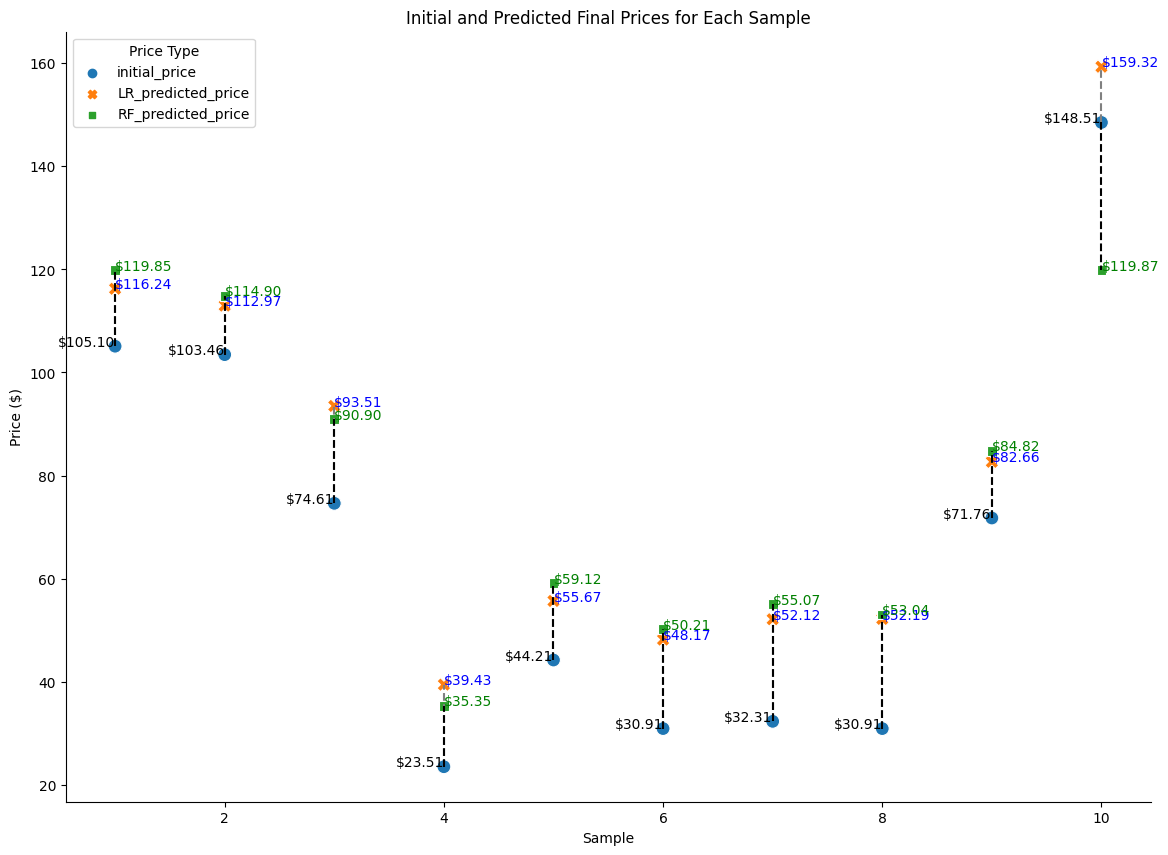

In [131]:
X = df_auction.drop(columns=['Final_Price'])  # Features
y = df_auction['Final_Price']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Initialize and train another model, e.g., RandomForest Regressor
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train_scaled, y_train)

# Function to generate random values for the input features
def generate_random_input():
    initial_price = random.uniform(10, 150)  # Initial prices between $10 and $150
    bidders = random.randint(1, 15)         # Number of bidders between 1 and 15
    days = random.randint(1, 10)            # Auction duration between 1 and 10 days
    bidder_activity = random.uniform(1, 5) # Bidder activity between 1 and 5
    return [initial_price, bidders, days, bidder_activity]

# Generate a sample of 10 sets of random input values
sample_inputs = [generate_random_input() for _ in range(10)]

# Scale the sample inputs
sample_inputs_scaled = scaler.transform(sample_inputs)

# Predict the final prices using the trained Linear Regression model
lr_predicted_prices = lr_model.predict(sample_inputs_scaled)

# Predict the final prices using the trained Decision Tree model
rf_predicted_prices = rf_model.predict(sample_inputs_scaled)

# Create a DataFrame to store the inputs and predicted prices
data = pd.DataFrame(sample_inputs, columns=['initial_price', 'bidders', 'days', 'bidder_activity'])
data['LR_predicted_price'] = lr_predicted_prices
data['RF_predicted_price'] = rf_predicted_prices
data['sample'] = data.index + 1

# Print random predictions
print("Random predictions:")
for i, res in enumerate(sample_inputs):
    print(f"Sample {i+1} ==> Bidders: {res[1]}, Days: {res[2]}, Bidder Activity: {res[3]:.2f},\nInitial Price: ${res[0]:.2f}"
          f"\nLR Predicted Final Price: ${lr_predicted_prices[i]:.2f}, \nRF Predicted Final Price: ${rf_predicted_prices[i]:.2f}\n")

# Plot the data using Seaborn and Matplotlib
plt.figure(figsize=(14, 10))

# Create a long-form DataFrame for plotting
long_data = pd.melt(data, id_vars='sample', value_vars=['initial_price', 'LR_predicted_price', 'RF_predicted_price'], 
                    var_name='price_type', value_name='price')

# Plot the points for initial and predicted prices
sns.scatterplot(data=long_data, x='sample', y='price', hue='price_type', style='price_type', palette='tab10', s=100)

# Draw lines connecting initial and predicted prices for each model
for i in range(1, 11):
    plt.plot([i, i], [data.loc[i-1, 'initial_price'], data.loc[i-1, 'LR_predicted_price']], color='gray', linestyle='--')
    plt.plot([i, i], [data.loc[i-1, 'initial_price'], data.loc[i-1, 'RF_predicted_price']], color='black', linestyle='--')
    # Annotate the points with their values
    plt.text(i, data.loc[i-1, 'initial_price'], f"${data.loc[i-1, 'initial_price']:.2f}", 
             horizontalalignment='right', size='medium', color='black')
    plt.text(i, data.loc[i-1, 'LR_predicted_price'], f"${data.loc[i-1, 'LR_predicted_price']:.2f}", 
             horizontalalignment='left', size='medium', color='blue')
    plt.text(i, data.loc[i-1, 'RF_predicted_price'], f"${data.loc[i-1, 'RF_predicted_price']:.2f}", 
             horizontalalignment='left', size='medium', color='green')

# Customize the plot aesthetics
plt.title('Initial and Predicted Final Prices for Each Sample')
plt.xlabel('Sample')
plt.ylabel('Price ($)')
plt.legend(title='Price Type')
plt.grid(False)  # Turn off the grid
sns.despine()  # Remove the top and right spines

# Show the plot
plt.show()

In [132]:
# Calculate the increase percentage for both models
data['LR_increase_percentage'] = round(((data['LR_predicted_price'] - data['initial_price']) / data['initial_price']) * 100, 2)
data['RF_increase_percentage'] = round(((data['RF_predicted_price'] - data['initial_price']) / data['initial_price']) * 100, 2)

# Calculate the difference between the Prices of the two models
data['Price difference RF - LR'] = (data['RF_predicted_price'] - data['LR_predicted_price'])

# Create a single DataFrame to show the desired results for both models
combined_increase_perc = data[['initial_price', 'bidders', 'days', 'bidder_activity', 'LR_predicted_price', 'LR_increase_percentage', 'RF_predicted_price', 'RF_increase_percentage', 'Price difference RF - LR']]
combined_increase_perc = combined_increase_perc.rename(columns={
    'initial_price': 'Initial Price ($)',
    'bidders': 'No Bidders',
    'days': 'Auction Duration (days)',
    'bidder_activity': 'Bidder Activity',
    'LR_predicted_price': 'LR Predicted Final Price ($)',
    'LR_increase_percentage': 'LR Increase (%)',
    'RF_predicted_price': 'RF Predicted Final Price ($)',
    'RF_increase_percentage': 'RF Increase (%)',
    'Price difference RF - LR': 'Final Price difference between models'
})

# Function to apply color and format based on values
def color_and_format(val):
    if val < 0:
        return f'color: red; font-weight: bold;', f'{abs(val):.2f}'
    elif val > 0:
        return f'color: green; font-weight: bold;', f'{val:.2f}'
    return '', f'{val:.2f}'

# Apply the function to the DataFrame
styled_combined_increase_perc = combined_increase_perc.style.applymap(lambda val: color_and_format(val)[0], subset=['Final Price difference between models']).format({col: lambda val: color_and_format(val)[1] for col in combined_increase_perc.columns if col != 'Final Price difference between models'})

# Apply color formatting to the 'Price difference' column separately
styled_combined_increase_perc = styled_combined_increase_perc.applymap(lambda val: f'color: red; font-weight: bold;' if val < 0 else (f'color: green; font-weight: bold;' if val > 0 else ''), subset=['Final Price difference between models'])

# Display the styled DataFrame
styled_combined_increase_perc